/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691

Cross-validation accuracy: 0.4067


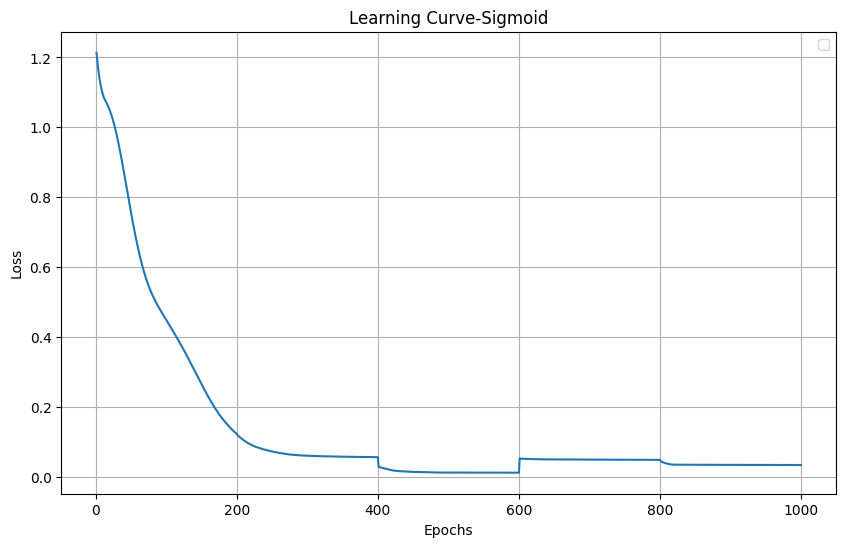

Number of Hidden Layers:  2, Neurons Per Layer: 5, 5, Learning Rate: 0.01


In [1]:
# Part 4: Sklearn Neural Network
# Much of the code was adapted from https://scikit-learn.org/stable/modules/neural_networks_supervised.html
# As well as from ECE 3851 Lecture
# Did this in a similar manner to the from scratch for a better comparison.
import numpy as np
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt



# Had to rewrite the class for Neural Network, It did not want to work with the class I had created from scratch.
class NeuralNetwork:
    def __init__(self, hidden_layers = (100,), learning_rate = 0.001, max_iter = 200, random_state = 42):
        self.hidden_layers = hidden_layers
        self.learning_rate = learning_rate
        self.max_iter = max_iter
        self.random_state = random_state
        self.train_losses = []

# Load the data inside the class to make references easier
    def load_data(self):
        iris = load_iris()
        x, y = iris.data, iris.target
        return x, y

# Create the Model.  This was taken from Sklearn's Website
    def create_model(self):
        self.model = MLPClassifier(hidden_layer_sizes = self.hidden_layers, activation='logistic',  learning_rate_init = self.learning_rate,max_iter = 1, warm_start = True,random_state = self.random_state)




# Cross Validation for Test and Training Accuracy Testing
# This too was taken from Sklearn's website in the Cross Validation Section
    def cross_validate(self, x, y, cv = 5):
        skf = StratifiedKFold(n_splits = cv, shuffle = True, random_state = self.random_state)
        scores = []
        for train_index, test_index in skf.split(x, y):
            X_train, X_test = x[train_index], x[test_index]
            y_train, y_test = y[train_index], y[test_index]
            self.train(X_train, y_train)
            score = self.model.score(X_test, y_test)
            scores.append(score)
        print(f"Cross-validation accuracy: {np.mean(scores):.4f}")
        return scores

# Train the Neural Network
    def train(self, X_train, y_train):
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        for _ in range(self.max_iter):
            self.model.fit(X_train_scaled, y_train)
            self.train_losses.append(self.model.loss_)

# Plot the Learning Curves for Comparisons
    def plot_learning_curve(self):
        plt.figure(figsize =( 10, 6))
        plt.plot(range(1, len(self.train_losses) + 1), self.train_losses)
        plt.xlabel("Epochs")
        plt.ylabel("Loss")
        plt.title(f"Learning Curve-Sigmoid")
        plt.legend(loc="best")
        plt.grid()
        plt.show()


# Create the Neural Network
nn = NeuralNetwork(hidden_layers = (5,5), learning_rate = 0.01, max_iter = 200)
# Load the Data from the Iris Dataset
x, y = nn.load_data()
# Create the Model
nn.create_model()
# Cross Validate
nn.cross_validate(x, y)
# Plot the Learning Curve
nn.plot_learning_curve()

print("Number of Hidden Layers:  2, Neurons Per Layer: 5, 5, Learning Rate: 0.01")

In [ ]:
# Part 4: Sklearn Neural Network
# Much of the code was adapted from https://scikit-learn.org/stable/modules/neural_networks_supervised.html
# As well as from ECE 3851 Lecture
# Did this in a similar manner to the from scratch for a better comparison.
import numpy as np
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt



# Had to rewrite the class for Neural Network, It did not want to work with the class I had created from scratch.
class NeuralNetwork:
    def __init__(self, hidden_layers = (100,), learning_rate = 0.001, max_iter = 200, random_state = 42):
        self.hidden_layers = hidden_layers
        self.learning_rate = learning_rate
        self.max_iter = max_iter
        self.random_state = random_state
        self.train_losses = []

# Load the data inside the class to make references easier
    def load_data(self):
        iris = load_iris()
        x, y = iris.data, iris.target
        return x, y

# Create the Model.  This was taken from Sklearn's Website
    def create_model(self):
        self.model = MLPClassifier(hidden_layer_sizes = self.hidden_layers, activation='logistic',  learning_rate_init = self.learning_rate,max_iter = 1, warm_start = True,random_state = self.random_state)




# Cross Validation for Test and Training Accuracy Testing
# This too was taken from Sklearn's website in the Cross Validation Section
    def cross_validate(self, x, y, cv = 5):
        skf = StratifiedKFold(n_splits = cv, shuffle = True, random_state = self.random_state)
        scores = []
        for train_index, test_index in skf.split(x, y):
            X_train, X_test = x[train_index], x[test_index]
            y_train, y_test = y[train_index], y[test_index]
            self.train(X_train, y_train)
            score = self.model.score(X_test, y_test)
            scores.append(score)
        print(f"Cross-validation accuracy: {np.mean(scores):.4f}")
        return scores

# Train the Neural Network
    def train(self, X_train, y_train):
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        for _ in range(self.max_iter):
            self.model.fit(X_train_scaled, y_train)
            self.train_losses.append(self.model.loss_)

# Plot the Learning Curves for Comparisons
    def plot_learning_curve(self):
        plt.figure(figsize =( 10, 6))
        plt.plot(range(1, len(self.train_losses) + 1), self.train_losses)
        plt.xlabel("Epochs")
        plt.ylabel("Loss")
        plt.title(f"Learning Curve-Sigmoid")
        plt.legend(loc="best")
        plt.grid()
        plt.show()


# Create the Neural Network
nn = NeuralNetwork(hidden_layers = (10,10), learning_rate = 0.01, max_iter = 200)
# Load the Data from the Iris Dataset
x, y = nn.load_data()
# Create the Model
nn.create_model()
# Cross Validate
nn.cross_validate(x, y)
# Plot the Learning Curve
nn.plot_learning_curve()

print("Number of Hidden Layers:  2, Neurons Per Layer: 10, 10, Learning Rate: 0.01")

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691

Cross-validation accuracy: 0.4800


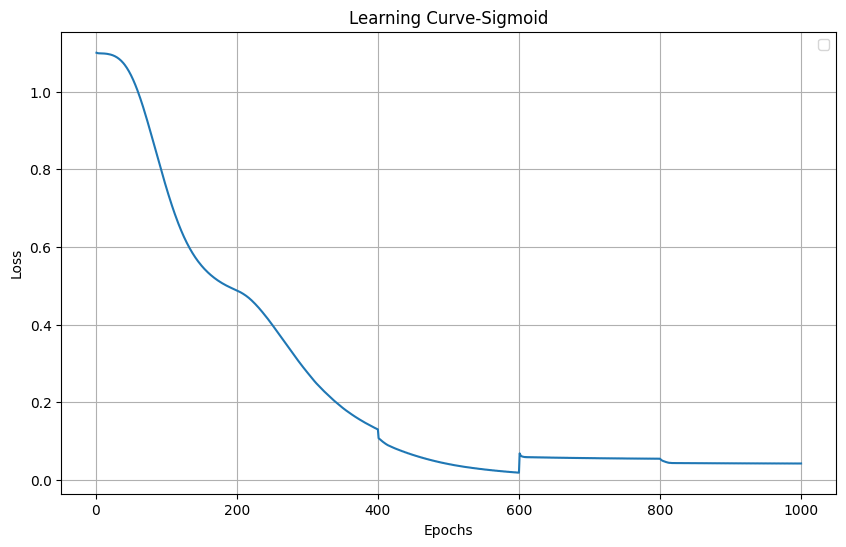

Number of Hidden Layers:  3, Neurons Per Layer: 4, 4, 2, Learning Rate: 0.01


In [ ]:
# Part 4: Sklearn Neural Network
# Much of the code was adapted from https://scikit-learn.org/stable/modules/neural_networks_supervised.html
# As well as from ECE 3851 Lecture
# Did this in a similar manner to the from scratch for a better comparison.
import numpy as np
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt



# Had to rewrite the class for Neural Network, It did not want to work with the class I had created from scratch.
class NeuralNetwork:
    def __init__(self, hidden_layers = (100,), learning_rate = 0.001, max_iter = 200, random_state = 42):
        self.hidden_layers = hidden_layers
        self.learning_rate = learning_rate
        self.max_iter = max_iter
        self.random_state = random_state
        self.train_losses = []

# Load the data inside the class to make references easier
    def load_data(self):
        iris = load_iris()
        x, y = iris.data, iris.target
        return x, y

# Create the Model.  This was taken from Sklearn's Website
    def create_model(self):
        self.model = MLPClassifier(hidden_layer_sizes = self.hidden_layers, activation='logistic',  learning_rate_init = self.learning_rate,max_iter = 1, warm_start = True,random_state = self.random_state)




# Cross Validation for Test and Training Accuracy Testing
# This too was taken from Sklearn's website in the Cross Validation Section
    def cross_validate(self, x, y, cv = 5):
        skf = StratifiedKFold(n_splits = cv, shuffle = True, random_state = self.random_state)
        scores = []
        for train_index, test_index in skf.split(x, y):
            X_train, X_test = x[train_index], x[test_index]
            y_train, y_test = y[train_index], y[test_index]
            self.train(X_train, y_train)
            score = self.model.score(X_test, y_test)
            scores.append(score)
        print(f"Cross-validation accuracy: {np.mean(scores):.4f}")
        return scores

# Train the Neural Network
    def train(self, X_train, y_train):
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        for _ in range(self.max_iter):
            self.model.fit(X_train_scaled, y_train)
            self.train_losses.append(self.model.loss_)

# Plot the Learning Curves for Comparisons
    def plot_learning_curve(self):
        plt.figure(figsize =( 10, 6))
        plt.plot(range(1, len(self.train_losses) + 1), self.train_losses)
        plt.xlabel("Epochs")
        plt.ylabel("Loss")
        plt.title(f"Learning Curve-Sigmoid")
        plt.legend(loc="best")
        plt.grid()
        plt.show()


# Create the Neural Network
nn = NeuralNetwork(hidden_layers = (4, 4, 2), learning_rate = 0.01, max_iter = 200)
# Load the Data from the Iris Dataset
x, y = nn.load_data()
# Create the Model
nn.create_model()
# Cross Validate
nn.cross_validate(x, y)
# Plot the Learning Curve
nn.plot_learning_curve()

print("Number of Hidden Layers:  3, Neurons Per Layer: 4, 4, 2, Learning Rate: 0.01")

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691

Cross-validation accuracy: 0.3333


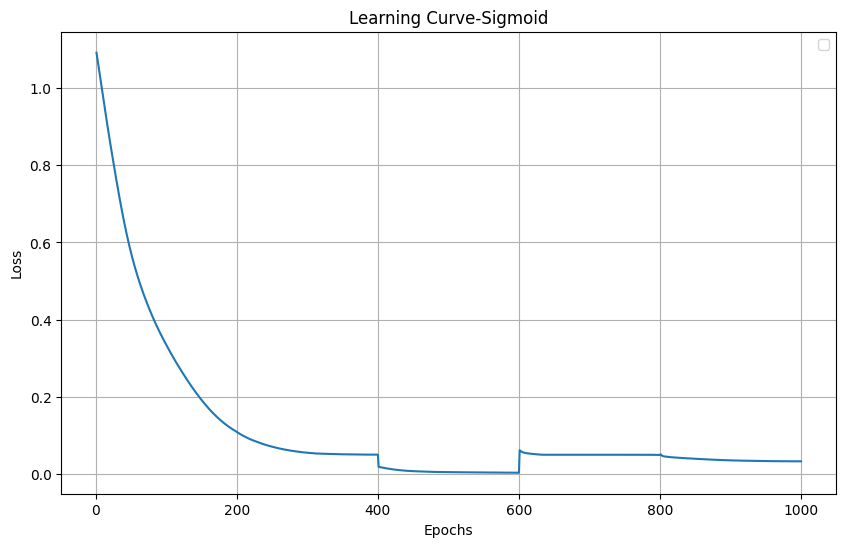

Number of Hidden Layers:  1, Neurons Per Layer: 5, Learning Rate: 0.01


In [ ]:
# Part 4: Sklearn Neural Network
# Much of the code was adapted from https://scikit-learn.org/stable/modules/neural_networks_supervised.html
# As well as from ECE 3851 Lecture
# Did this in a similar manner to the from scratch for a better comparison.
import numpy as np
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt



# Had to rewrite the class for Neural Network, It did not want to work with the class I had created from scratch.
class NeuralNetwork:
    def __init__(self, hidden_layers = (100,), learning_rate = 0.001, max_iter = 200, random_state = 42):
        self.hidden_layers = hidden_layers
        self.learning_rate = learning_rate
        self.max_iter = max_iter
        self.random_state = random_state
        self.train_losses = []

# Load the data inside the class to make references easier
    def load_data(self):
        iris = load_iris()
        x, y = iris.data, iris.target
        return x, y

# Create the Model.  This was taken from Sklearn's Website
    def create_model(self):
        self.model = MLPClassifier(hidden_layer_sizes = self.hidden_layers, activation='logistic',  learning_rate_init = self.learning_rate,max_iter = 1, warm_start = True,random_state = self.random_state)




# Cross Validation for Test and Training Accuracy Testing
# This too was taken from Sklearn's website in the Cross Validation Section
    def cross_validate(self, x, y, cv = 5):
        skf = StratifiedKFold(n_splits = cv, shuffle = True, random_state = self.random_state)
        scores = []
        for train_index, test_index in skf.split(x, y):
            X_train, X_test = x[train_index], x[test_index]
            y_train, y_test = y[train_index], y[test_index]
            self.train(X_train, y_train)
            score = self.model.score(X_test, y_test)
            scores.append(score)
        print(f"Cross-validation accuracy: {np.mean(scores):.4f}")
        return scores

# Train the Neural Network
    def train(self, X_train, y_train):
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        for _ in range(self.max_iter):
            self.model.fit(X_train_scaled, y_train)
            self.train_losses.append(self.model.loss_)

# Plot the Learning Curves for Comparisons
    def plot_learning_curve(self):
        plt.figure(figsize =( 10, 6))
        plt.plot(range(1, len(self.train_losses) + 1), self.train_losses)
        plt.xlabel("Epochs")
        plt.ylabel("Loss")
        plt.title(f"Learning Curve-Sigmoid")
        plt.legend(loc="best")
        plt.grid()
        plt.show()


# Create the Neural Network
nn = NeuralNetwork(hidden_layers = (5), learning_rate = 0.01, max_iter = 200)
# Load the Data from the Iris Dataset
x, y = nn.load_data()
# Create the Model
nn.create_model()
# Cross Validate
nn.cross_validate(x, y)
# Plot the Learning Curve
nn.plot_learning_curve()

print("Number of Hidden Layers:  1, Neurons Per Layer: 5, Learning Rate: 0.01")

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691

Cross-validation accuracy: 0.3333


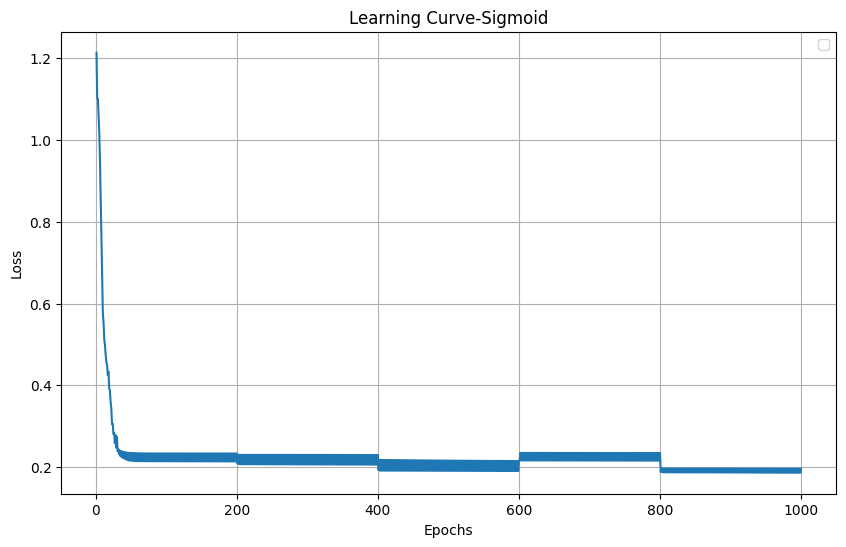

Number of Hidden Layers:  2, Neurons Per Layer: 5, 5, Learning Rate: 0.1


In [ ]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt



# Had to rewrite the class for Neural Network, It did not want to work with the class I had created from scratch.
class NeuralNetwork:
    def __init__(self, hidden_layers = (100,), learning_rate = 0.001, max_iter = 200, random_state = 42):
        self.hidden_layers = hidden_layers
        self.learning_rate = learning_rate
        self.max_iter = max_iter
        self.random_state = random_state
        self.train_losses = []

# Load the data inside the class to make references easier
    def load_data(self):
        iris = load_iris()
        x, y = iris.data, iris.target
        return x, y

# Create the Model.  This was taken from Sklearn's Website
    def create_model(self):
        self.model = MLPClassifier(hidden_layer_sizes = self.hidden_layers, activation='logistic',  learning_rate_init = self.learning_rate,max_iter = 1, warm_start = True,random_state = self.random_state)




# Cross Validation for Test and Training Accuracy Testing
# This too was taken from Sklearn's website in the Cross Validation Section
    def cross_validate(self, x, y, cv = 5):
        skf = StratifiedKFold(n_splits = cv, shuffle = True, random_state = self.random_state)
        scores = []
        for train_index, test_index in skf.split(x, y):
            X_train, X_test = x[train_index], x[test_index]
            y_train, y_test = y[train_index], y[test_index]
            self.train(X_train, y_train)
            score = self.model.score(X_test, y_test)
            scores.append(score)
        print(f"Cross-validation accuracy: {np.mean(scores):.4f}")
        return scores

# Train the Neural Network
    def train(self, X_train, y_train):
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        for _ in range(self.max_iter):
            self.model.fit(X_train_scaled, y_train)
            self.train_losses.append(self.model.loss_)

# Plot the Learning Curves for Comparisons
    def plot_learning_curve(self):
        plt.figure(figsize =( 10, 6))
        plt.plot(range(1, len(self.train_losses) + 1), self.train_losses)
        plt.xlabel("Epochs")
        plt.ylabel("Loss")
        plt.title(f"Learning Curve-Sigmoid")
        plt.legend(loc="best")
        plt.grid()
        plt.show()


# Create the Neural Network
nn = NeuralNetwork(hidden_layers = (5, 5), learning_rate = 0.1, max_iter = 200)
# Load the Data from the Iris Dataset
x, y = nn.load_data()
# Create the Model
nn.create_model()
# Cross Validate
nn.cross_validate(x, y)
# Plot the Learning Curve
nn.plot_learning_curve()

print("Number of Hidden Layers:  2, Neurons Per Layer: 5, 5, Learning Rate: 0.1")



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691

Cross-validation accuracy: 0.3800


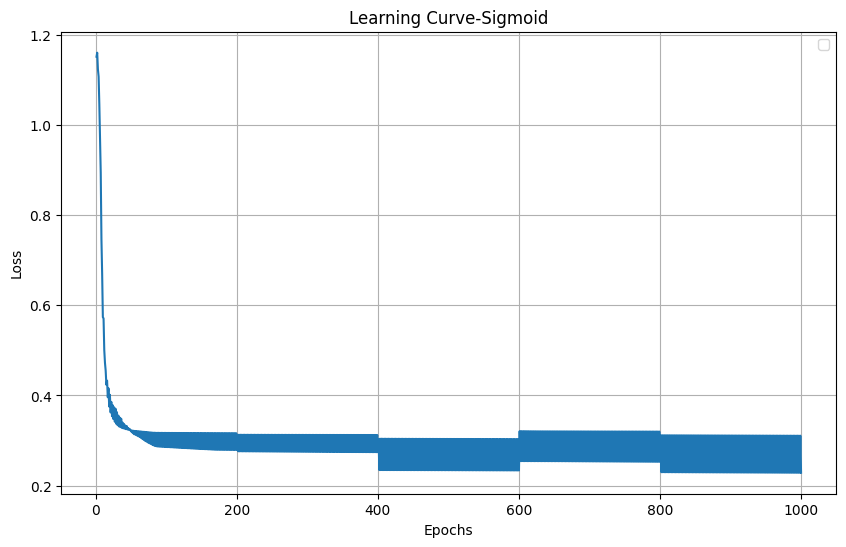

Number of Hidden Layers:  2, Neurons Per Layer: 10, 10, Learning Rate: 0.1


In [ ]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt



# Had to rewrite the class for Neural Network, It did not want to work with the class I had created from scratch.
class NeuralNetwork:
    def __init__(self, hidden_layers = (100,), learning_rate = 0.001, max_iter = 200, random_state = 42):
        self.hidden_layers = hidden_layers
        self.learning_rate = learning_rate
        self.max_iter = max_iter
        self.random_state = random_state
        self.train_losses = []

# Load the data inside the class to make references easier
    def load_data(self):
        iris = load_iris()
        x, y = iris.data, iris.target
        return x, y

# Create the Model.  This was taken from Sklearn's Website
    def create_model(self):
        self.model = MLPClassifier(hidden_layer_sizes = self.hidden_layers, activation='logistic',  learning_rate_init = self.learning_rate,max_iter = 1, warm_start = True,random_state = self.random_state)




# Cross Validation for Test and Training Accuracy Testing
# This too was taken from Sklearn's website in the Cross Validation Section
    def cross_validate(self, x, y, cv = 5):
        skf = StratifiedKFold(n_splits = cv, shuffle = True, random_state = self.random_state)
        scores = []
        for train_index, test_index in skf.split(x, y):
            X_train, X_test = x[train_index], x[test_index]
            y_train, y_test = y[train_index], y[test_index]
            self.train(X_train, y_train)
            score = self.model.score(X_test, y_test)
            scores.append(score)
        print(f"Cross-validation accuracy: {np.mean(scores):.4f}")
        return scores

# Train the Neural Network
    def train(self, X_train, y_train):
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        for _ in range(self.max_iter):
            self.model.fit(X_train_scaled, y_train)
            self.train_losses.append(self.model.loss_)

# Plot the Learning Curves for Comparisons
    def plot_learning_curve(self):
        plt.figure(figsize =( 10, 6))
        plt.plot(range(1, len(self.train_losses) + 1), self.train_losses)
        plt.xlabel("Epochs")
        plt.ylabel("Loss")
        plt.title(f"Learning Curve-Sigmoid")
        plt.legend(loc="best")
        plt.grid()
        plt.show()


# Create the Neural Network
nn = NeuralNetwork(hidden_layers = (10, 10), learning_rate = 0.1, max_iter = 200)
# Load the Data from the Iris Dataset
x, y = nn.load_data()
# Create the Model
nn.create_model()
# Cross Validate
nn.cross_validate(x, y)
# Plot the Learning Curve
nn.plot_learning_curve()

print("Number of Hidden Layers:  2, Neurons Per Layer: 10, 10, Learning Rate: 0.1")



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691

Cross-validation accuracy: 0.7267


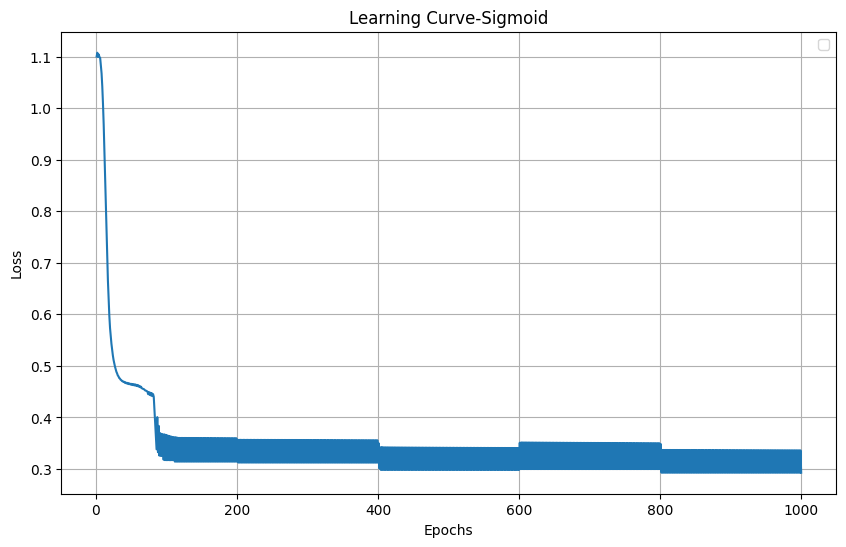

Number of Hidden Layers:  3, Neurons Per Layer: 4, 4, 2, Learning Rate: 0.1


In [ ]:
# Part 4: Sklearn Neural Network
# Much of the code was adapted from https://scikit-learn.org/stable/modules/neural_networks_supervised.html
# As well as from ECE 3851 Lecture
# Did this in a similar manner to the from scratch for a better comparison.
import numpy as np
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt



# Had to rewrite the class for Neural Network, It did not want to work with the class I had created from scratch.
class NeuralNetwork:
    def __init__(self, hidden_layers = (100,), learning_rate = 0.001, max_iter = 200, random_state = 42):
        self.hidden_layers = hidden_layers
        self.learning_rate = learning_rate
        self.max_iter = max_iter
        self.random_state = random_state
        self.train_losses = []

# Load the data inside the class to make references easier
    def load_data(self):
        iris = load_iris()
        x, y = iris.data, iris.target
        return x, y

# Create the Model.  This was taken from Sklearn's Website
    def create_model(self):
        self.model = MLPClassifier(hidden_layer_sizes = self.hidden_layers, activation='logistic',  learning_rate_init = self.learning_rate,max_iter = 1, warm_start = True,random_state = self.random_state)




# Cross Validation for Test and Training Accuracy Testing
# This too was taken from Sklearn's website in the Cross Validation Section
    def cross_validate(self, x, y, cv = 5):
        skf = StratifiedKFold(n_splits = cv, shuffle = True, random_state = self.random_state)
        scores = []
        for train_index, test_index in skf.split(x, y):
            X_train, X_test = x[train_index], x[test_index]
            y_train, y_test = y[train_index], y[test_index]
            self.train(X_train, y_train)
            score = self.model.score(X_test, y_test)
            scores.append(score)
        print(f"Cross-validation accuracy: {np.mean(scores):.4f}")
        return scores

# Train the Neural Network
    def train(self, X_train, y_train):
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        for _ in range(self.max_iter):
            self.model.fit(X_train_scaled, y_train)
            self.train_losses.append(self.model.loss_)

# Plot the Learning Curves for Comparisons
    def plot_learning_curve(self):
        plt.figure(figsize =( 10, 6))
        plt.plot(range(1, len(self.train_losses) + 1), self.train_losses)
        plt.xlabel("Epochs")
        plt.ylabel("Loss")
        plt.title(f"Learning Curve-Sigmoid")
        plt.legend(loc="best")
        plt.grid()
        plt.show()


# Create the Neural Network
nn = NeuralNetwork(hidden_layers = (4, 4, 2), learning_rate = 0.1, max_iter = 200)
# Load the Data from the Iris Dataset
x, y = nn.load_data()
# Create the Model
nn.create_model()
# Cross Validate
nn.cross_validate(x, y)
# Plot the Learning Curve
nn.plot_learning_curve()

print("Number of Hidden Layers:  3, Neurons Per Layer: 4, 4, 2, Learning Rate: 0.1")



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691

Cross-validation accuracy: 0.3333


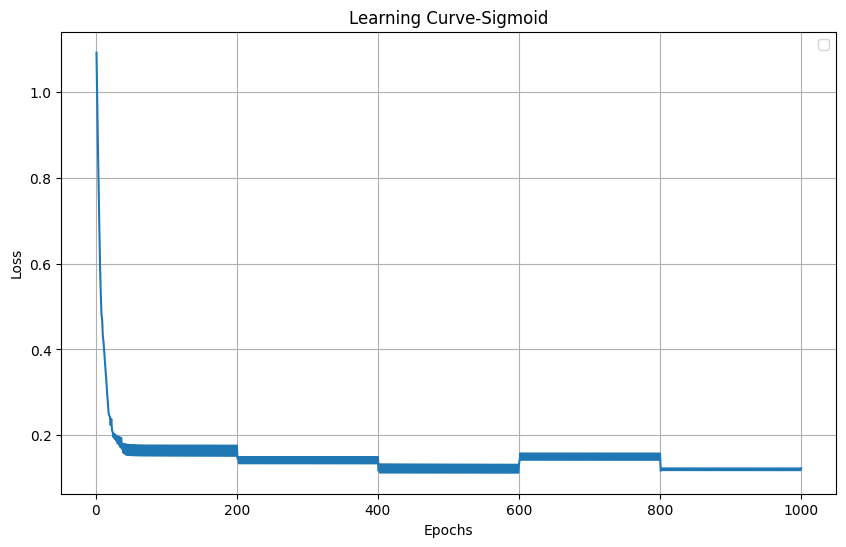

Number of Hidden Layers:  1, Neurons Per Layer: 5, Learning Rate: 0.1


In [ ]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt



# Had to rewrite the class for Neural Network, It did not want to work with the class I had created from scratch.
class NeuralNetwork:
    def __init__(self, hidden_layers = (100,), learning_rate = 0.001, max_iter = 200, random_state = 42):
        self.hidden_layers = hidden_layers
        self.learning_rate = learning_rate
        self.max_iter = max_iter
        self.random_state = random_state
        self.train_losses = []

# Load the data inside the class to make references easier
    def load_data(self):
        iris = load_iris()
        x, y = iris.data, iris.target
        return x, y

# Create the Model.  This was taken from Sklearn's Website
    def create_model(self):
        self.model = MLPClassifier(hidden_layer_sizes = self.hidden_layers, activation='logistic',  learning_rate_init = self.learning_rate,max_iter = 1, warm_start = True,random_state = self.random_state)




# Cross Validation for Test and Training Accuracy Testing
# This too was taken from Sklearn's website in the Cross Validation Section
    def cross_validate(self, x, y, cv = 5):
        skf = StratifiedKFold(n_splits = cv, shuffle = True, random_state = self.random_state)
        scores = []
        for train_index, test_index in skf.split(x, y):
            X_train, X_test = x[train_index], x[test_index]
            y_train, y_test = y[train_index], y[test_index]
            self.train(X_train, y_train)
            score = self.model.score(X_test, y_test)
            scores.append(score)
        print(f"Cross-validation accuracy: {np.mean(scores):.4f}")
        return scores

# Train the Neural Network
    def train(self, X_train, y_train):
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        for _ in range(self.max_iter):
            self.model.fit(X_train_scaled, y_train)
            self.train_losses.append(self.model.loss_)

# Plot the Learning Curves for Comparisons
    def plot_learning_curve(self):
        plt.figure(figsize =( 10, 6))
        plt.plot(range(1, len(self.train_losses) + 1), self.train_losses)
        plt.xlabel("Epochs")
        plt.ylabel("Loss")
        plt.title(f"Learning Curve-Sigmoid")
        plt.legend(loc="best")
        plt.grid()
        plt.show()


# Create the Neural Network
nn = NeuralNetwork(hidden_layers = (5), learning_rate = 0.1, max_iter = 200)
# Load the Data from the Iris Dataset
x, y = nn.load_data()
# Create the Model
nn.create_model()
# Cross Validate
nn.cross_validate(x, y)
# Plot the Learning Curve
nn.plot_learning_curve()

print("Number of Hidden Layers:  1, Neurons Per Layer: 5, Learning Rate: 0.1")



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691

Cross-validation accuracy: 0.3533


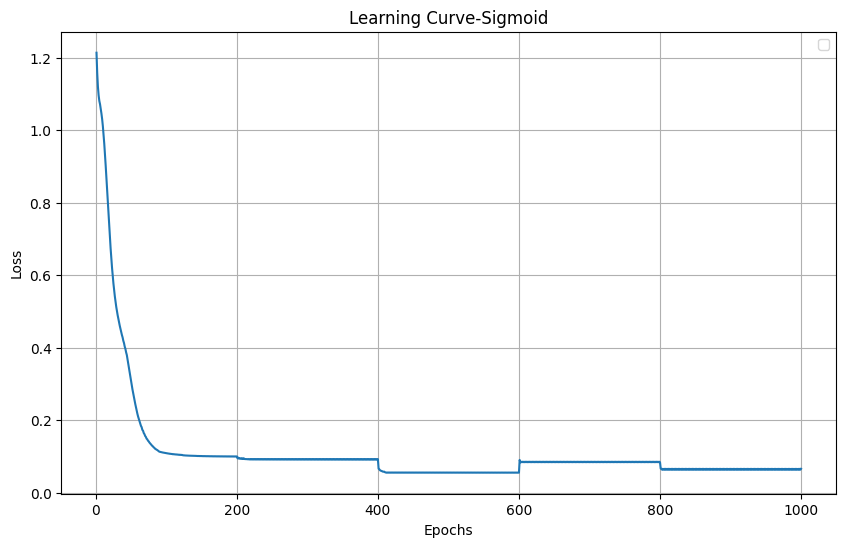

Number of Hidden Layers:  2, Neurons Per Layer: 5, 5, Learning Rate: 0.03


In [ ]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt



# Had to rewrite the class for Neural Network, It did not want to work with the class I had created from scratch.
class NeuralNetwork:
    def __init__(self, hidden_layers = (100,), learning_rate = 0.001, max_iter = 200, random_state = 42):
        self.hidden_layers = hidden_layers
        self.learning_rate = learning_rate
        self.max_iter = max_iter
        self.random_state = random_state
        self.train_losses = []

# Load the data inside the class to make references easier
    def load_data(self):
        iris = load_iris()
        x, y = iris.data, iris.target
        return x, y

# Create the Model.  This was taken from Sklearn's Website
    def create_model(self):
        self.model = MLPClassifier(hidden_layer_sizes = self.hidden_layers, activation='logistic',  learning_rate_init = self.learning_rate,max_iter = 1, warm_start = True,random_state = self.random_state)




# Cross Validation for Test and Training Accuracy Testing
# This too was taken from Sklearn's website in the Cross Validation Section
    def cross_validate(self, x, y, cv = 5):
        skf = StratifiedKFold(n_splits = cv, shuffle = True, random_state = self.random_state)
        scores = []
        for train_index, test_index in skf.split(x, y):
            X_train, X_test = x[train_index], x[test_index]
            y_train, y_test = y[train_index], y[test_index]
            self.train(X_train, y_train)
            score = self.model.score(X_test, y_test)
            scores.append(score)
        print(f"Cross-validation accuracy: {np.mean(scores):.4f}")
        return scores

# Train the Neural Network
    def train(self, X_train, y_train):
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        for _ in range(self.max_iter):
            self.model.fit(X_train_scaled, y_train)
            self.train_losses.append(self.model.loss_)

# Plot the Learning Curves for Comparisons
    def plot_learning_curve(self):
        plt.figure(figsize =( 10, 6))
        plt.plot(range(1, len(self.train_losses) + 1), self.train_losses)
        plt.xlabel("Epochs")
        plt.ylabel("Loss")
        plt.title(f"Learning Curve-Sigmoid")
        plt.legend(loc="best")
        plt.grid()
        plt.show()


# Create the Neural Network
nn = NeuralNetwork(hidden_layers = (5, 5), learning_rate = 0.03, max_iter = 200)
# Load the Data from the Iris Dataset
x, y = nn.load_data()
# Create the Model
nn.create_model()
# Cross Validate
nn.cross_validate(x, y)
# Plot the Learning Curve
nn.plot_learning_curve()

print("Number of Hidden Layers:  2, Neurons Per Layer: 5, 5, Learning Rate: 0.03")



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691

Cross-validation accuracy: 0.3400


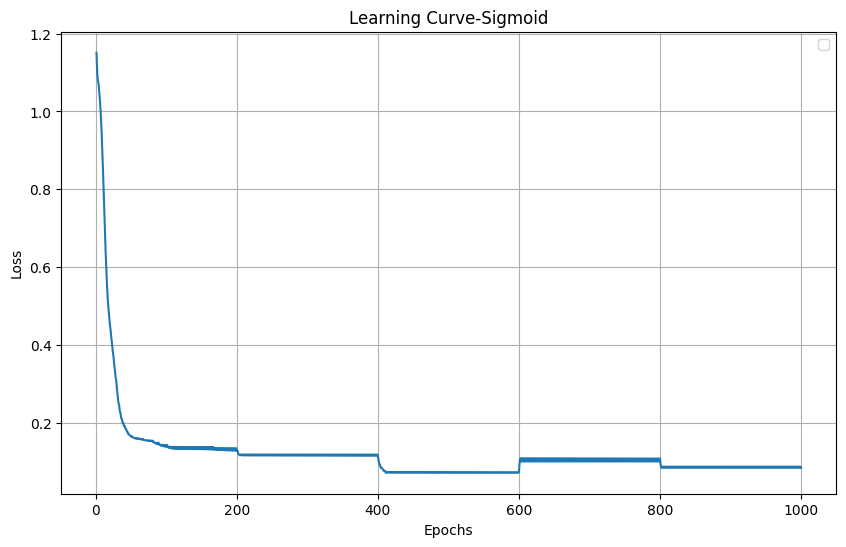

Number of Hidden Layers:  2, Neurons Per Layer: 10, 109, Learning Rate: 0.03


In [ ]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt



# Had to rewrite the class for Neural Network, It did not want to work with the class I had created from scratch.
class NeuralNetwork:
    def __init__(self, hidden_layers = (100,), learning_rate = 0.001, max_iter = 200, random_state = 42):
        self.hidden_layers = hidden_layers
        self.learning_rate = learning_rate
        self.max_iter = max_iter
        self.random_state = random_state
        self.train_losses = []

# Load the data inside the class to make references easier
    def load_data(self):
        iris = load_iris()
        x, y = iris.data, iris.target
        return x, y

# Create the Model.  This was taken from Sklearn's Website
    def create_model(self):
        self.model = MLPClassifier(hidden_layer_sizes = self.hidden_layers, activation='logistic',  learning_rate_init = self.learning_rate,max_iter = 1, warm_start = True,random_state = self.random_state)




# Cross Validation for Test and Training Accuracy Testing
# This too was taken from Sklearn's website in the Cross Validation Section
    def cross_validate(self, x, y, cv = 5):
        skf = StratifiedKFold(n_splits = cv, shuffle = True, random_state = self.random_state)
        scores = []
        for train_index, test_index in skf.split(x, y):
            X_train, X_test = x[train_index], x[test_index]
            y_train, y_test = y[train_index], y[test_index]
            self.train(X_train, y_train)
            score = self.model.score(X_test, y_test)
            scores.append(score)
        print(f"Cross-validation accuracy: {np.mean(scores):.4f}")
        return scores

# Train the Neural Network
    def train(self, X_train, y_train):
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        for _ in range(self.max_iter):
            self.model.fit(X_train_scaled, y_train)
            self.train_losses.append(self.model.loss_)

# Plot the Learning Curves for Comparisons
    def plot_learning_curve(self):
        plt.figure(figsize =( 10, 6))
        plt.plot(range(1, len(self.train_losses) + 1), self.train_losses)
        plt.xlabel("Epochs")
        plt.ylabel("Loss")
        plt.title(f"Learning Curve-Sigmoid")
        plt.legend(loc="best")
        plt.grid()
        plt.show()


# Create the Neural Network
nn = NeuralNetwork(hidden_layers = (10, 10), learning_rate = 0.03, max_iter = 200)
# Load the Data from the Iris Dataset
x, y = nn.load_data()
# Create the Model
nn.create_model()
# Cross Validate
nn.cross_validate(x, y)
# Plot the Learning Curve
nn.plot_learning_curve()

print("Number of Hidden Layers:  2, Neurons Per Layer: 10, 109, Learning Rate: 0.03")



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691

Cross-validation accuracy: 0.6600


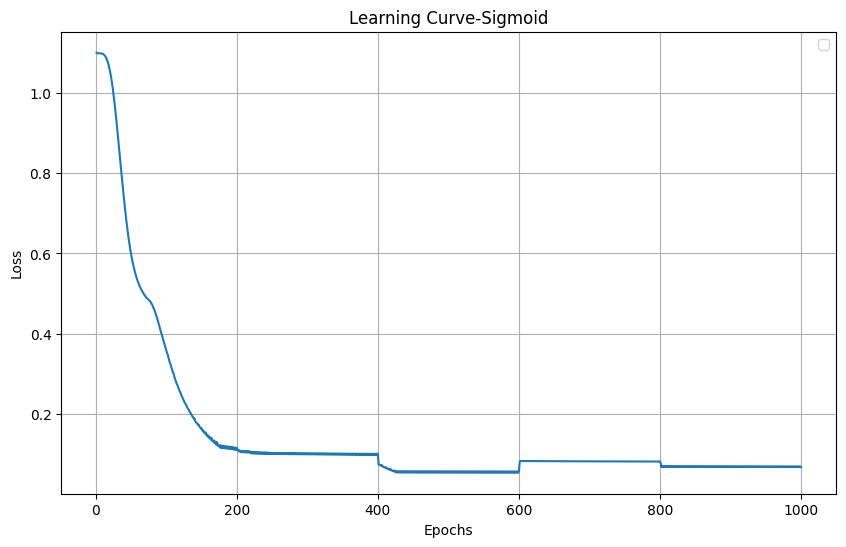

Number of Hidden Layers:  3, Neurons Per Layer: 4, 4, 2, Learning Rate: 0.03


In [ ]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt



# Had to rewrite the class for Neural Network, It did not want to work with the class I had created from scratch.
class NeuralNetwork:
    def __init__(self, hidden_layers = (100,), learning_rate = 0.001, max_iter = 200, random_state = 42):
        self.hidden_layers = hidden_layers
        self.learning_rate = learning_rate
        self.max_iter = max_iter
        self.random_state = random_state
        self.train_losses = []

# Load the data inside the class to make references easier
    def load_data(self):
        iris = load_iris()
        x, y = iris.data, iris.target
        return x, y

# Create the Model.  This was taken from Sklearn's Website
    def create_model(self):
        self.model = MLPClassifier(hidden_layer_sizes = self.hidden_layers, activation='logistic',  learning_rate_init = self.learning_rate,max_iter = 1, warm_start = True,random_state = self.random_state)




# Cross Validation for Test and Training Accuracy Testing
# This too was taken from Sklearn's website in the Cross Validation Section
    def cross_validate(self, x, y, cv = 5):
        skf = StratifiedKFold(n_splits = cv, shuffle = True, random_state = self.random_state)
        scores = []
        for train_index, test_index in skf.split(x, y):
            X_train, X_test = x[train_index], x[test_index]
            y_train, y_test = y[train_index], y[test_index]
            self.train(X_train, y_train)
            score = self.model.score(X_test, y_test)
            scores.append(score)
        print(f"Cross-validation accuracy: {np.mean(scores):.4f}")
        return scores

# Train the Neural Network
    def train(self, X_train, y_train):
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        for _ in range(self.max_iter):
            self.model.fit(X_train_scaled, y_train)
            self.train_losses.append(self.model.loss_)

# Plot the Learning Curves for Comparisons
    def plot_learning_curve(self):
        plt.figure(figsize =( 10, 6))
        plt.plot(range(1, len(self.train_losses) + 1), self.train_losses)
        plt.xlabel("Epochs")
        plt.ylabel("Loss")
        plt.title(f"Learning Curve-Sigmoid")
        plt.legend(loc="best")
        plt.grid()
        plt.show()


# Create the Neural Network
nn = NeuralNetwork(hidden_layers = (4, 4, 2), learning_rate = 0.03, max_iter = 200)
# Load the Data from the Iris Dataset
x, y = nn.load_data()
# Create the Model
nn.create_model()
# Cross Validate
nn.cross_validate(x, y)
# Plot the Learning Curve
nn.plot_learning_curve()

print("Number of Hidden Layers:  3, Neurons Per Layer: 4, 4, 2, Learning Rate: 0.03")



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691

Cross-validation accuracy: 0.3333


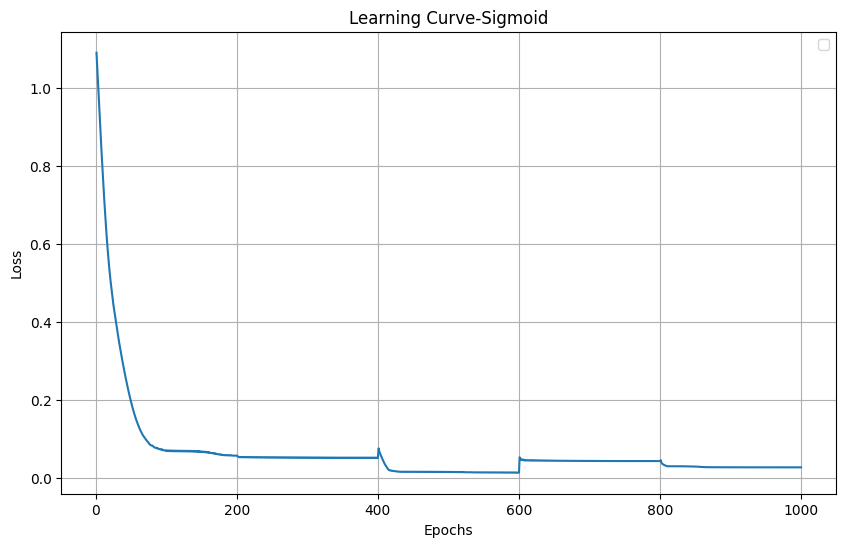

Number of Hidden Layers:  1, Neurons Per Layer: 5, Learning Rate: 0.03


In [ ]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt



# Had to rewrite the class for Neural Network, It did not want to work with the class I had created from scratch.
class NeuralNetwork:
    def __init__(self, hidden_layers = (100,), learning_rate = 0.001, max_iter = 200, random_state = 42):
        self.hidden_layers = hidden_layers
        self.learning_rate = learning_rate
        self.max_iter = max_iter
        self.random_state = random_state
        self.train_losses = []

# Load the data inside the class to make references easier
    def load_data(self):
        iris = load_iris()
        x, y = iris.data, iris.target
        return x, y

# Create the Model.  This was taken from Sklearn's Website
    def create_model(self):
        self.model = MLPClassifier(hidden_layer_sizes = self.hidden_layers, activation='logistic',  learning_rate_init = self.learning_rate,max_iter = 1, warm_start = True,random_state = self.random_state)




# Cross Validation for Test and Training Accuracy Testing
# This too was taken from Sklearn's website in the Cross Validation Section
    def cross_validate(self, x, y, cv = 5):
        skf = StratifiedKFold(n_splits = cv, shuffle = True, random_state = self.random_state)
        scores = []
        for train_index, test_index in skf.split(x, y):
            X_train, X_test = x[train_index], x[test_index]
            y_train, y_test = y[train_index], y[test_index]
            self.train(X_train, y_train)
            score = self.model.score(X_test, y_test)
            scores.append(score)
        print(f"Cross-validation accuracy: {np.mean(scores):.4f}")
        return scores

# Train the Neural Network
    def train(self, X_train, y_train):
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        for _ in range(self.max_iter):
            self.model.fit(X_train_scaled, y_train)
            self.train_losses.append(self.model.loss_)

# Plot the Learning Curves for Comparisons
    def plot_learning_curve(self):
        plt.figure(figsize =( 10, 6))
        plt.plot(range(1, len(self.train_losses) + 1), self.train_losses)
        plt.xlabel("Epochs")
        plt.ylabel("Loss")
        plt.title(f"Learning Curve-Sigmoid")
        plt.legend(loc="best")
        plt.grid()
        plt.show()


# Create the Neural Network
nn = NeuralNetwork(hidden_layers = (5), learning_rate = 0.03, max_iter = 200)
# Load the Data from the Iris Dataset
x, y = nn.load_data()
# Create the Model
nn.create_model()
# Cross Validate
nn.cross_validate(x, y)
# Plot the Learning Curve
nn.plot_learning_curve()

print("Number of Hidden Layers:  1, Neurons Per Layer: 5, Learning Rate: 0.03")



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691

Cross-validation accuracy: 0.3333


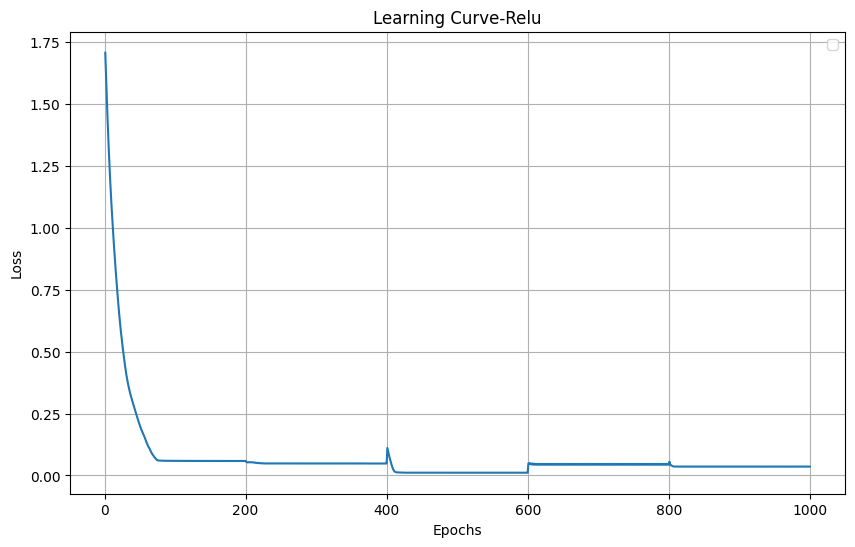

Number of Hidden Layers:  2, Neurons Per Layer: 5, 5, Learning Rate: 0.01


In [ ]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt



# Had to rewrite the class for Neural Network, It did not want to work with the class I had created from scratch.
class NeuralNetwork:
    def __init__(self, hidden_layers = (100,), learning_rate = 0.001, max_iter = 200, random_state = 42):
        self.hidden_layers = hidden_layers
        self.learning_rate = learning_rate
        self.max_iter = max_iter
        self.random_state = random_state
        self.train_losses = []

# Load the data inside the class to make references easier
    def load_data(self):
        iris = load_iris()
        x, y = iris.data, iris.target
        return x, y

# Create the Model.  This was taken from Sklearn's Website
    def create_model(self):
        self.model = MLPClassifier(hidden_layer_sizes = self.hidden_layers, activation='relu',  learning_rate_init = self.learning_rate,max_iter = 1, warm_start = True,random_state = self.random_state)




# Cross Validation for Test and Training Accuracy Testing
# This too was taken from Sklearn's website in the Cross Validation Section
    def cross_validate(self, x, y, cv = 5):
        skf = StratifiedKFold(n_splits = cv, shuffle = True, random_state = self.random_state)
        scores = []
        for train_index, test_index in skf.split(x, y):
            X_train, X_test = x[train_index], x[test_index]
            y_train, y_test = y[train_index], y[test_index]
            self.train(X_train, y_train)
            score = self.model.score(X_test, y_test)
            scores.append(score)
        print(f"Cross-validation accuracy: {np.mean(scores):.4f}")
        return scores

# Train the Neural Network
    def train(self, X_train, y_train):
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        for _ in range(self.max_iter):
            self.model.fit(X_train_scaled, y_train)
            self.train_losses.append(self.model.loss_)

# Plot the Learning Curves for Comparisons
    def plot_learning_curve(self):
        plt.figure(figsize =( 10, 6))
        plt.plot(range(1, len(self.train_losses) + 1), self.train_losses)
        plt.xlabel("Epochs")
        plt.ylabel("Loss")
        plt.title(f"Learning Curve-Relu")
        plt.legend(loc="best")
        plt.grid()
        plt.show()


# Create the Neural Network
nn = NeuralNetwork(hidden_layers = (5, 5), learning_rate = 0.01, max_iter = 200)
# Load the Data from the Iris Dataset
x, y = nn.load_data()
# Create the Model
nn.create_model()
# Cross Validate
nn.cross_validate(x, y)
# Plot the Learning Curve
nn.plot_learning_curve()

print("Number of Hidden Layers:  2, Neurons Per Layer: 5, 5, Learning Rate: 0.01")



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691

Cross-validation accuracy: 0.3333


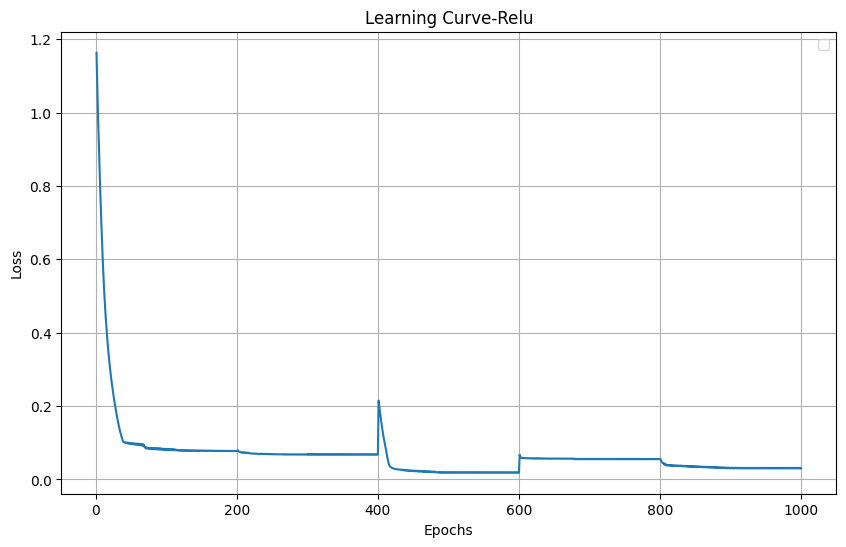

Number of Hidden Layers:  2, Neurons Per Layer: 10, 10, Learning Rate: 0.01


In [ ]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt



# Had to rewrite the class for Neural Network, It did not want to work with the class I had created from scratch.
class NeuralNetwork:
    def __init__(self, hidden_layers = (100,), learning_rate = 0.001, max_iter = 200, random_state = 42):
        self.hidden_layers = hidden_layers
        self.learning_rate = learning_rate
        self.max_iter = max_iter
        self.random_state = random_state
        self.train_losses = []

# Load the data inside the class to make references easier
    def load_data(self):
        iris = load_iris()
        x, y = iris.data, iris.target
        return x, y

# Create the Model.  This was taken from Sklearn's Website
    def create_model(self):
        self.model = MLPClassifier(hidden_layer_sizes = self.hidden_layers, activation='relu',  learning_rate_init = self.learning_rate,max_iter = 1, warm_start = True,random_state = self.random_state)




# Cross Validation for Test and Training Accuracy Testing
# This too was taken from Sklearn's website in the Cross Validation Section
    def cross_validate(self, x, y, cv = 5):
        skf = StratifiedKFold(n_splits = cv, shuffle = True, random_state = self.random_state)
        scores = []
        for train_index, test_index in skf.split(x, y):
            X_train, X_test = x[train_index], x[test_index]
            y_train, y_test = y[train_index], y[test_index]
            self.train(X_train, y_train)
            score = self.model.score(X_test, y_test)
            scores.append(score)
        print(f"Cross-validation accuracy: {np.mean(scores):.4f}")
        return scores

# Train the Neural Network
    def train(self, X_train, y_train):
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        for _ in range(self.max_iter):
            self.model.fit(X_train_scaled, y_train)
            self.train_losses.append(self.model.loss_)

# Plot the Learning Curves for Comparisons
    def plot_learning_curve(self):
        plt.figure(figsize =( 10, 6))
        plt.plot(range(1, len(self.train_losses) + 1), self.train_losses)
        plt.xlabel("Epochs")
        plt.ylabel("Loss")
        plt.title(f"Learning Curve-Relu")
        plt.legend(loc="best")
        plt.grid()
        plt.show()


# Create the Neural Network
nn = NeuralNetwork(hidden_layers = (10, 10), learning_rate = 0.01, max_iter = 200)
# Load the Data from the Iris Dataset
x, y = nn.load_data()
# Create the Model
nn.create_model()
# Cross Validate
nn.cross_validate(x, y)
# Plot the Learning Curve
nn.plot_learning_curve()

print("Number of Hidden Layers:  2, Neurons Per Layer: 10, 10, Learning Rate: 0.01")



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691

Cross-validation accuracy: 0.3333


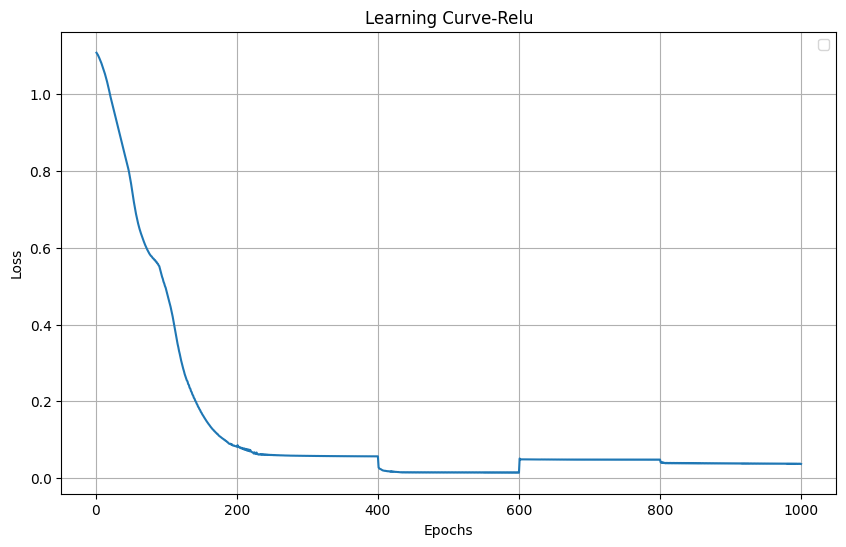

Number of Hidden Layers: 3, Neurons Per Layer: 4, 4, 2, Learning Rate: 0.01


In [ ]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt



# Had to rewrite the class for Neural Network, It did not want to work with the class I had created from scratch.
class NeuralNetwork:
    def __init__(self, hidden_layers = (100,), learning_rate = 0.001, max_iter = 200, random_state = 42):
        self.hidden_layers = hidden_layers
        self.learning_rate = learning_rate
        self.max_iter = max_iter
        self.random_state = random_state
        self.train_losses = []

# Load the data inside the class to make references easier
    def load_data(self):
        iris = load_iris()
        x, y = iris.data, iris.target
        return x, y

# Create the Model.  This was taken from Sklearn's Website
    def create_model(self):
        self.model = MLPClassifier(hidden_layer_sizes = self.hidden_layers, activation='relu',  learning_rate_init = self.learning_rate,max_iter = 1, warm_start = True,random_state = self.random_state)




# Cross Validation for Test and Training Accuracy Testing
# This too was taken from Sklearn's website in the Cross Validation Section
    def cross_validate(self, x, y, cv = 5):
        skf = StratifiedKFold(n_splits = cv, shuffle = True, random_state = self.random_state)
        scores = []
        for train_index, test_index in skf.split(x, y):
            X_train, X_test = x[train_index], x[test_index]
            y_train, y_test = y[train_index], y[test_index]
            self.train(X_train, y_train)
            score = self.model.score(X_test, y_test)
            scores.append(score)
        print(f"Cross-validation accuracy: {np.mean(scores):.4f}")
        return scores

# Train the Neural Network
    def train(self, X_train, y_train):
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        for _ in range(self.max_iter):
            self.model.fit(X_train_scaled, y_train)
            self.train_losses.append(self.model.loss_)

# Plot the Learning Curves for Comparisons
    def plot_learning_curve(self):
        plt.figure(figsize =( 10, 6))
        plt.plot(range(1, len(self.train_losses) + 1), self.train_losses)
        plt.xlabel("Epochs")
        plt.ylabel("Loss")
        plt.title(f"Learning Curve-Relu")
        plt.legend(loc="best")
        plt.grid()
        plt.show()


# Create the Neural Network
nn = NeuralNetwork(hidden_layers = (4, 4, 2), learning_rate = 0.01, max_iter = 200)
# Load the Data from the Iris Dataset
x, y = nn.load_data()
# Create the Model
nn.create_model()
# Cross Validate
nn.cross_validate(x, y)
# Plot the Learning Curve
nn.plot_learning_curve()

print("Number of Hidden Layers: 3, Neurons Per Layer: 4, 4, 2, Learning Rate: 0.01")



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691

Cross-validation accuracy: 0.3333


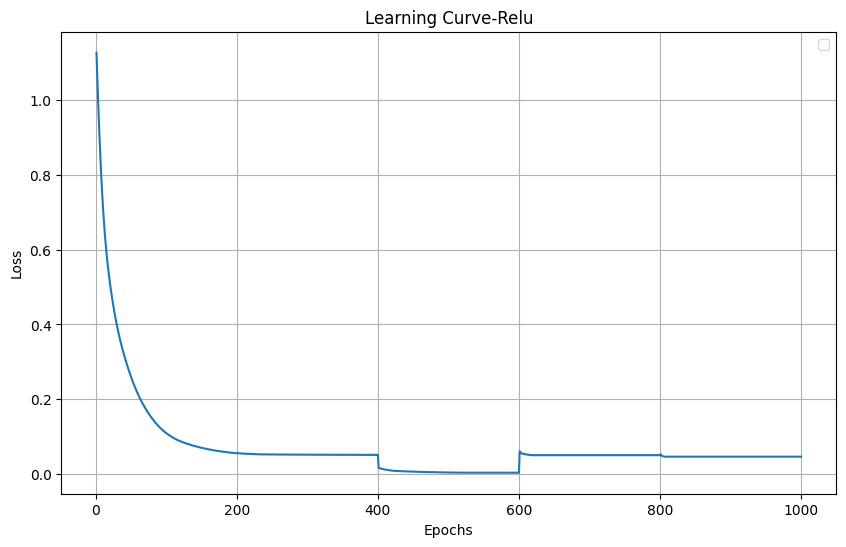

Number of Hidden Layers:  1, Neurons Per Layer: 5, Learning Rate: 0.01


In [ ]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt



# Had to rewrite the class for Neural Network, It did not want to work with the class I had created from scratch.
class NeuralNetwork:
    def __init__(self, hidden_layers = (100,), learning_rate = 0.001, max_iter = 200, random_state = 42):
        self.hidden_layers = hidden_layers
        self.learning_rate = learning_rate
        self.max_iter = max_iter
        self.random_state = random_state
        self.train_losses = []

# Load the data inside the class to make references easier
    def load_data(self):
        iris = load_iris()
        x, y = iris.data, iris.target
        return x, y

# Create the Model.  This was taken from Sklearn's Website
    def create_model(self):
        self.model = MLPClassifier(hidden_layer_sizes = self.hidden_layers, activation='relu',  learning_rate_init = self.learning_rate,max_iter = 1, warm_start = True,random_state = self.random_state)




# Cross Validation for Test and Training Accuracy Testing
# This too was taken from Sklearn's website in the Cross Validation Section
    def cross_validate(self, x, y, cv = 5):
        skf = StratifiedKFold(n_splits = cv, shuffle = True, random_state = self.random_state)
        scores = []
        for train_index, test_index in skf.split(x, y):
            X_train, X_test = x[train_index], x[test_index]
            y_train, y_test = y[train_index], y[test_index]
            self.train(X_train, y_train)
            score = self.model.score(X_test, y_test)
            scores.append(score)
        print(f"Cross-validation accuracy: {np.mean(scores):.4f}")
        return scores

# Train the Neural Network
    def train(self, X_train, y_train):
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        for _ in range(self.max_iter):
            self.model.fit(X_train_scaled, y_train)
            self.train_losses.append(self.model.loss_)

# Plot the Learning Curves for Comparisons
    def plot_learning_curve(self):
        plt.figure(figsize =( 10, 6))
        plt.plot(range(1, len(self.train_losses) + 1), self.train_losses)
        plt.xlabel("Epochs")
        plt.ylabel("Loss")
        plt.title(f"Learning Curve-Relu")
        plt.legend(loc="best")
        plt.grid()
        plt.show()


# Create the Neural Network
nn = NeuralNetwork(hidden_layers = (5), learning_rate = 0.01, max_iter = 200)
# Load the Data from the Iris Dataset
x, y = nn.load_data()
# Create the Model
nn.create_model()
# Cross Validate
nn.cross_validate(x, y)
# Plot the Learning Curve
nn.plot_learning_curve()

print("Number of Hidden Layers:  1, Neurons Per Layer: 5, Learning Rate: 0.01")



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691

Cross-validation accuracy: 0.3533


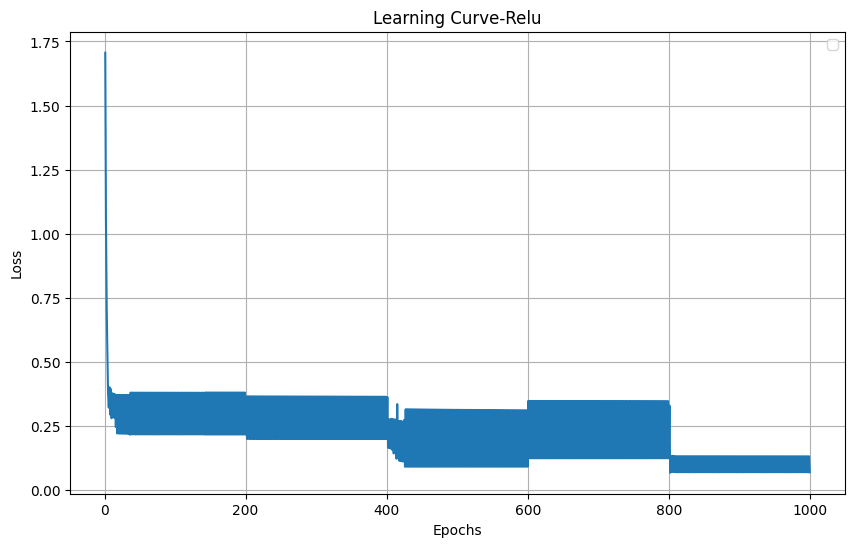

Number of Hidden Layers:  2, Neurons Per Layer: 5, 5, Learning Rate: 0.1


In [ ]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt



# Had to rewrite the class for Neural Network, It did not want to work with the class I had created from scratch.
class NeuralNetwork:
    def __init__(self, hidden_layers = (100,), learning_rate = 0.001, max_iter = 200, random_state = 42):
        self.hidden_layers = hidden_layers
        self.learning_rate = learning_rate
        self.max_iter = max_iter
        self.random_state = random_state
        self.train_losses = []

# Load the data inside the class to make references easier
    def load_data(self):
        iris = load_iris()
        x, y = iris.data, iris.target
        return x, y

# Create the Model.  This was taken from Sklearn's Website
    def create_model(self):
        self.model = MLPClassifier(hidden_layer_sizes = self.hidden_layers, activation='relu',  learning_rate_init = self.learning_rate,max_iter = 1, warm_start = True,random_state = self.random_state)




# Cross Validation for Test and Training Accuracy Testing
# This too was taken from Sklearn's website in the Cross Validation Section
    def cross_validate(self, x, y, cv = 5):
        skf = StratifiedKFold(n_splits = cv, shuffle = True, random_state = self.random_state)
        scores = []
        for train_index, test_index in skf.split(x, y):
            X_train, X_test = x[train_index], x[test_index]
            y_train, y_test = y[train_index], y[test_index]
            self.train(X_train, y_train)
            score = self.model.score(X_test, y_test)
            scores.append(score)
        print(f"Cross-validation accuracy: {np.mean(scores):.4f}")
        return scores

# Train the Neural Network
    def train(self, X_train, y_train):
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        for _ in range(self.max_iter):
            self.model.fit(X_train_scaled, y_train)
            self.train_losses.append(self.model.loss_)

# Plot the Learning Curves for Comparisons
    def plot_learning_curve(self):
        plt.figure(figsize =( 10, 6))
        plt.plot(range(1, len(self.train_losses) + 1), self.train_losses)
        plt.xlabel("Epochs")
        plt.ylabel("Loss")
        plt.title(f"Learning Curve-Relu")
        plt.legend(loc="best")
        plt.grid()
        plt.show()


# Create the Neural Network
nn = NeuralNetwork(hidden_layers = (5, 5), learning_rate = 0.1, max_iter = 200)
# Load the Data from the Iris Dataset
x, y = nn.load_data()
# Create the Model
nn.create_model()
# Cross Validate
nn.cross_validate(x, y)
# Plot the Learning Curve
nn.plot_learning_curve()

print("Number of Hidden Layers:  2, Neurons Per Layer: 5, 5, Learning Rate: 0.1")



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691

Cross-validation accuracy: 0.4400


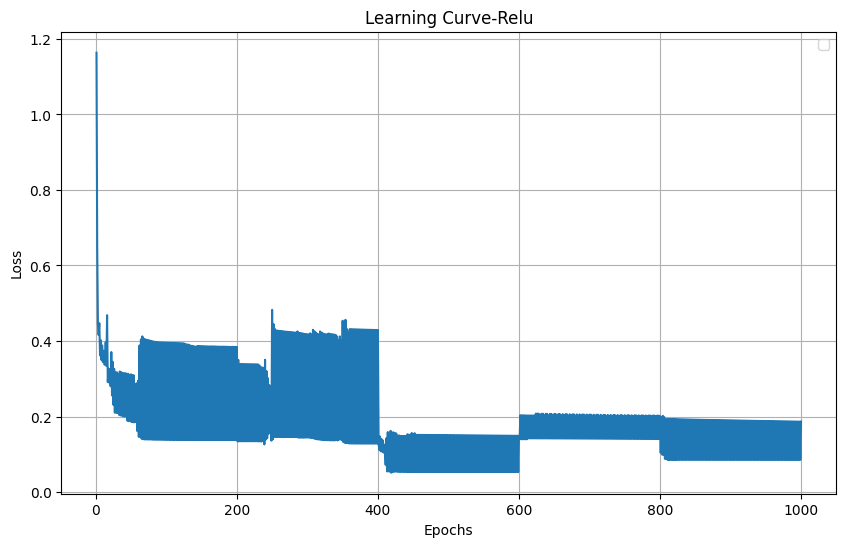

Number of Hidden Layers:  2, Neurons Per Layer: 10, 10, Learning Rate: 0.1


In [ ]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt



# Had to rewrite the class for Neural Network, It did not want to work with the class I had created from scratch.
class NeuralNetwork:
    def __init__(self, hidden_layers = (100,), learning_rate = 0.001, max_iter = 200, random_state = 42):
        self.hidden_layers = hidden_layers
        self.learning_rate = learning_rate
        self.max_iter = max_iter
        self.random_state = random_state
        self.train_losses = []

# Load the data inside the class to make references easier
    def load_data(self):
        iris = load_iris()
        x, y = iris.data, iris.target
        return x, y

# Create the Model.  This was taken from Sklearn's Website
    def create_model(self):
        self.model = MLPClassifier(hidden_layer_sizes = self.hidden_layers, activation='relu',  learning_rate_init = self.learning_rate,max_iter = 1, warm_start = True,random_state = self.random_state)




# Cross Validation for Test and Training Accuracy Testing
# This too was taken from Sklearn's website in the Cross Validation Section
    def cross_validate(self, x, y, cv = 5):
        skf = StratifiedKFold(n_splits = cv, shuffle = True, random_state = self.random_state)
        scores = []
        for train_index, test_index in skf.split(x, y):
            X_train, X_test = x[train_index], x[test_index]
            y_train, y_test = y[train_index], y[test_index]
            self.train(X_train, y_train)
            score = self.model.score(X_test, y_test)
            scores.append(score)
        print(f"Cross-validation accuracy: {np.mean(scores):.4f}")
        return scores

# Train the Neural Network
    def train(self, X_train, y_train):
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        for _ in range(self.max_iter):
            self.model.fit(X_train_scaled, y_train)
            self.train_losses.append(self.model.loss_)

# Plot the Learning Curves for Comparisons
    def plot_learning_curve(self):
        plt.figure(figsize =( 10, 6))
        plt.plot(range(1, len(self.train_losses) + 1), self.train_losses)
        plt.xlabel("Epochs")
        plt.ylabel("Loss")
        plt.title(f"Learning Curve-Relu")
        plt.legend(loc="best")
        plt.grid()
        plt.show()


# Create the Neural Network
nn = NeuralNetwork(hidden_layers = (10, 10), learning_rate = 0.1, max_iter = 200)
# Load the Data from the Iris Dataset
x, y = nn.load_data()
# Create the Model
nn.create_model()
# Cross Validate
nn.cross_validate(x, y)
# Plot the Learning Curve
nn.plot_learning_curve()

print("Number of Hidden Layers:  2, Neurons Per Layer: 10, 10, Learning Rate: 0.1")



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691

Cross-validation accuracy: 0.3333


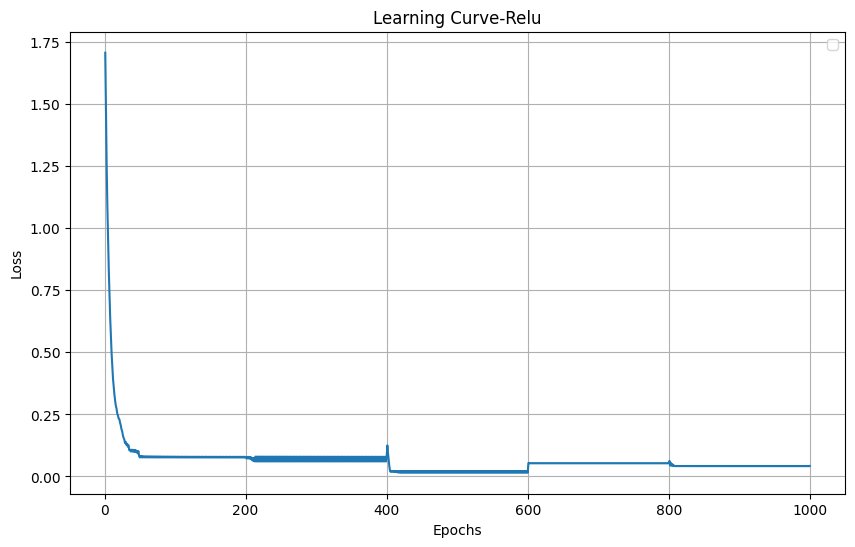

Number of Hidden Layers:  2, Neurons Per Layer: 5, 5, Learning Rate: 0.03


In [ ]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt



# Had to rewrite the class for Neural Network, It did not want to work with the class I had created from scratch.
class NeuralNetwork:
    def __init__(self, hidden_layers = (100,), learning_rate = 0.001, max_iter = 200, random_state = 42):
        self.hidden_layers = hidden_layers
        self.learning_rate = learning_rate
        self.max_iter = max_iter
        self.random_state = random_state
        self.train_losses = []

# Load the data inside the class to make references easier
    def load_data(self):
        iris = load_iris()
        x, y = iris.data, iris.target
        return x, y

# Create the Model.  This was taken from Sklearn's Website
    def create_model(self):
        self.model = MLPClassifier(hidden_layer_sizes = self.hidden_layers, activation='relu',  learning_rate_init = self.learning_rate,max_iter = 1, warm_start = True,random_state = self.random_state)




# Cross Validation for Test and Training Accuracy Testing
# This too was taken from Sklearn's website in the Cross Validation Section
    def cross_validate(self, x, y, cv = 5):
        skf = StratifiedKFold(n_splits = cv, shuffle = True, random_state = self.random_state)
        scores = []
        for train_index, test_index in skf.split(x, y):
            X_train, X_test = x[train_index], x[test_index]
            y_train, y_test = y[train_index], y[test_index]
            self.train(X_train, y_train)
            score = self.model.score(X_test, y_test)
            scores.append(score)
        print(f"Cross-validation accuracy: {np.mean(scores):.4f}")
        return scores

# Train the Neural Network
    def train(self, X_train, y_train):
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        for _ in range(self.max_iter):
            self.model.fit(X_train_scaled, y_train)
            self.train_losses.append(self.model.loss_)

# Plot the Learning Curves for Comparisons
    def plot_learning_curve(self):
        plt.figure(figsize =( 10, 6))
        plt.plot(range(1, len(self.train_losses) + 1), self.train_losses)
        plt.xlabel("Epochs")
        plt.ylabel("Loss")
        plt.title(f"Learning Curve-Relu")
        plt.legend(loc="best")
        plt.grid()
        plt.show()


# Create the Neural Network
nn = NeuralNetwork(hidden_layers = (5, 5), learning_rate = 0.03, max_iter = 200)
# Load the Data from the Iris Dataset
x, y = nn.load_data()
# Create the Model
nn.create_model()
# Cross Validate
nn.cross_validate(x, y)
# Plot the Learning Curve
nn.plot_learning_curve()

print("Number of Hidden Layers:  2, Neurons Per Layer: 5, 5, Learning Rate: 0.03")



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691

Cross-validation accuracy: 0.3333


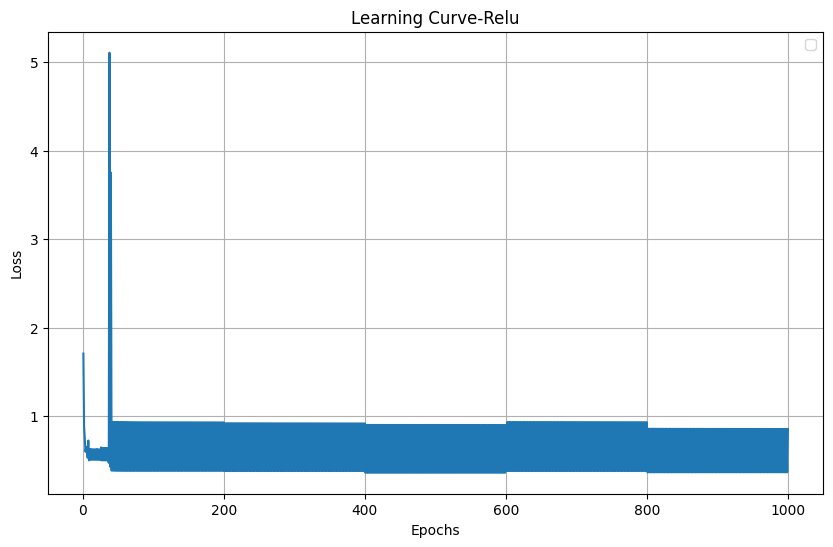

Number of Hidden Layers:  2, Neurons Per Layer: 5, 5, Learning Rate: 0.3


In [ ]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt



# Had to rewrite the class for Neural Network, It did not want to work with the class I had created from scratch.
class NeuralNetwork:
    def __init__(self, hidden_layers = (100,), learning_rate = 0.001, max_iter = 200, random_state = 42):
        self.hidden_layers = hidden_layers
        self.learning_rate = learning_rate
        self.max_iter = max_iter
        self.random_state = random_state
        self.train_losses = []

# Load the data inside the class to make references easier
    def load_data(self):
        iris = load_iris()
        x, y = iris.data, iris.target
        return x, y

# Create the Model.  This was taken from Sklearn's Website
    def create_model(self):
        self.model = MLPClassifier(hidden_layer_sizes = self.hidden_layers, activation='relu',  learning_rate_init = self.learning_rate,max_iter = 1, warm_start = True,random_state = self.random_state)




# Cross Validation for Test and Training Accuracy Testing
# This too was taken from Sklearn's website in the Cross Validation Section
    def cross_validate(self, x, y, cv = 5):
        skf = StratifiedKFold(n_splits = cv, shuffle = True, random_state = self.random_state)
        scores = []
        for train_index, test_index in skf.split(x, y):
            X_train, X_test = x[train_index], x[test_index]
            y_train, y_test = y[train_index], y[test_index]
            self.train(X_train, y_train)
            score = self.model.score(X_test, y_test)
            scores.append(score)
        print(f"Cross-validation accuracy: {np.mean(scores):.4f}")
        return scores

# Train the Neural Network
    def train(self, X_train, y_train):
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        for _ in range(self.max_iter):
            self.model.fit(X_train_scaled, y_train)
            self.train_losses.append(self.model.loss_)

# Plot the Learning Curves for Comparisons
    def plot_learning_curve(self):
        plt.figure(figsize =( 10, 6))
        plt.plot(range(1, len(self.train_losses) + 1), self.train_losses)
        plt.xlabel("Epochs")
        plt.ylabel("Loss")
        plt.title(f"Learning Curve-Relu")
        plt.legend(loc="best")
        plt.grid()
        plt.show()


# Create the Neural Network
nn = NeuralNetwork(hidden_layers = (5, 5), learning_rate = 0.3, max_iter = 200)
# Load the Data from the Iris Dataset
x, y = nn.load_data()
# Create the Model
nn.create_model()
# Cross Validate
nn.cross_validate(x, y)
# Plot the Learning Curve
nn.plot_learning_curve()

print("Number of Hidden Layers:  2, Neurons Per Layer: 5, 5, Learning Rate: 0.3")



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691

Cross-validation accuracy: 0.3867


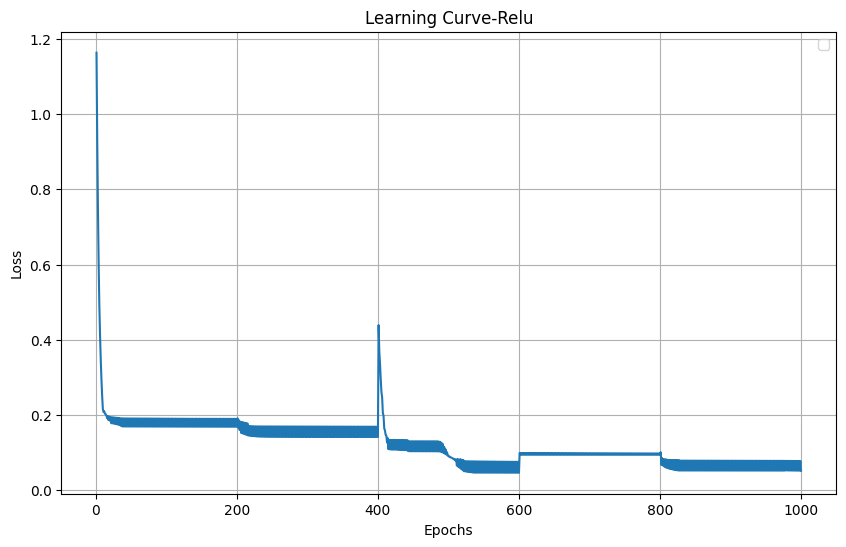

Number of Hidden Layers:  2, Neurons Per Layer: 10, 10, Learning Rate: 0.03


In [ ]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt



# Had to rewrite the class for Neural Network, It did not want to work with the class I had created from scratch.
class NeuralNetwork:
    def __init__(self, hidden_layers = (100,), learning_rate = 0.001, max_iter = 200, random_state = 42):
        self.hidden_layers = hidden_layers
        self.learning_rate = learning_rate
        self.max_iter = max_iter
        self.random_state = random_state
        self.train_losses = []

# Load the data inside the class to make references easier
    def load_data(self):
        iris = load_iris()
        x, y = iris.data, iris.target
        return x, y

# Create the Model.  This was taken from Sklearn's Website
    def create_model(self):
        self.model = MLPClassifier(hidden_layer_sizes = self.hidden_layers, activation='relu',  learning_rate_init = self.learning_rate,max_iter = 1, warm_start = True,random_state = self.random_state)




# Cross Validation for Test and Training Accuracy Testing
# This too was taken from Sklearn's website in the Cross Validation Section
    def cross_validate(self, x, y, cv = 5):
        skf = StratifiedKFold(n_splits = cv, shuffle = True, random_state = self.random_state)
        scores = []
        for train_index, test_index in skf.split(x, y):
            X_train, X_test = x[train_index], x[test_index]
            y_train, y_test = y[train_index], y[test_index]
            self.train(X_train, y_train)
            score = self.model.score(X_test, y_test)
            scores.append(score)
        print(f"Cross-validation accuracy: {np.mean(scores):.4f}")
        return scores

# Train the Neural Network
    def train(self, X_train, y_train):
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        for _ in range(self.max_iter):
            self.model.fit(X_train_scaled, y_train)
            self.train_losses.append(self.model.loss_)

# Plot the Learning Curves for Comparisons
    def plot_learning_curve(self):
        plt.figure(figsize =( 10, 6))
        plt.plot(range(1, len(self.train_losses) + 1), self.train_losses)
        plt.xlabel("Epochs")
        plt.ylabel("Loss")
        plt.title(f"Learning Curve-Relu")
        plt.legend(loc="best")
        plt.grid()
        plt.show()


# Create the Neural Network
nn = NeuralNetwork(hidden_layers = (10, 10), learning_rate = 0.03, max_iter = 200)
# Load the Data from the Iris Dataset
x, y = nn.load_data()
# Create the Model
nn.create_model()
# Cross Validate
nn.cross_validate(x, y)
# Plot the Learning Curve
nn.plot_learning_curve()

print("Number of Hidden Layers:  2, Neurons Per Layer: 10, 10, Learning Rate: 0.03")



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691

Cross-validation accuracy: 0.3667


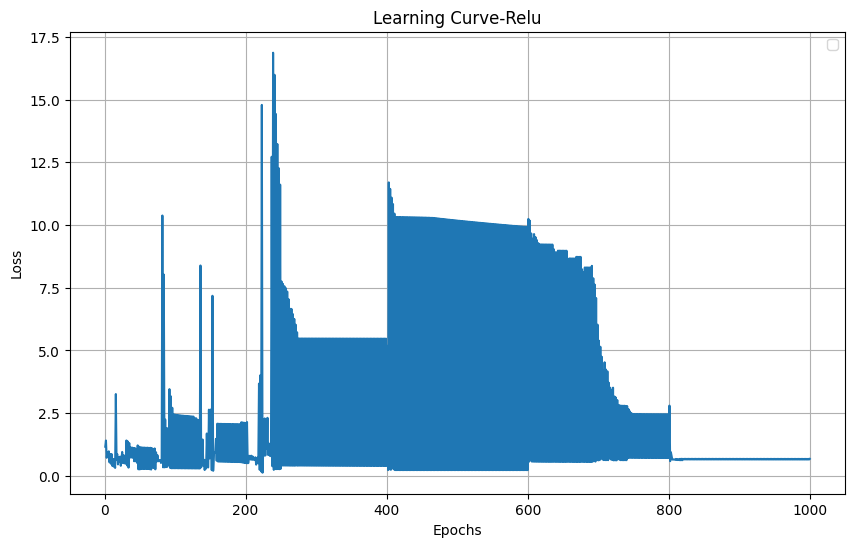

Number of Hidden Layers:  2, Neurons Per Layer: 10, 10, Learning Rate: 0.3


In [ ]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt



# Had to rewrite the class for Neural Network, It did not want to work with the class I had created from scratch.
class NeuralNetwork:
    def __init__(self, hidden_layers = (100,), learning_rate = 0.001, max_iter = 200, random_state = 42):
        self.hidden_layers = hidden_layers
        self.learning_rate = learning_rate
        self.max_iter = max_iter
        self.random_state = random_state
        self.train_losses = []

# Load the data inside the class to make references easier
    def load_data(self):
        iris = load_iris()
        x, y = iris.data, iris.target
        return x, y

# Create the Model.  This was taken from Sklearn's Website
    def create_model(self):
        self.model = MLPClassifier(hidden_layer_sizes = self.hidden_layers, activation='relu',  learning_rate_init = self.learning_rate,max_iter = 1, warm_start = True,random_state = self.random_state)




# Cross Validation for Test and Training Accuracy Testing
# This too was taken from Sklearn's website in the Cross Validation Section
    def cross_validate(self, x, y, cv = 5):
        skf = StratifiedKFold(n_splits = cv, shuffle = True, random_state = self.random_state)
        scores = []
        for train_index, test_index in skf.split(x, y):
            X_train, X_test = x[train_index], x[test_index]
            y_train, y_test = y[train_index], y[test_index]
            self.train(X_train, y_train)
            score = self.model.score(X_test, y_test)
            scores.append(score)
        print(f"Cross-validation accuracy: {np.mean(scores):.4f}")
        return scores

# Train the Neural Network
    def train(self, X_train, y_train):
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        for _ in range(self.max_iter):
            self.model.fit(X_train_scaled, y_train)
            self.train_losses.append(self.model.loss_)

# Plot the Learning Curves for Comparisons
    def plot_learning_curve(self):
        plt.figure(figsize =( 10, 6))
        plt.plot(range(1, len(self.train_losses) + 1), self.train_losses)
        plt.xlabel("Epochs")
        plt.ylabel("Loss")
        plt.title(f"Learning Curve-Relu")
        plt.legend(loc="best")
        plt.grid()
        plt.show()


# Create the Neural Network
nn = NeuralNetwork(hidden_layers = (10, 10), learning_rate = 0.3, max_iter = 200)
# Load the Data from the Iris Dataset
x, y = nn.load_data()
# Create the Model
nn.create_model()
# Cross Validate
nn.cross_validate(x, y)
# Plot the Learning Curve
nn.plot_learning_curve()

print("Number of Hidden Layers:  2, Neurons Per Layer: 10, 10, Learning Rate: 0.3")



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691

Cross-validation accuracy: 0.6000


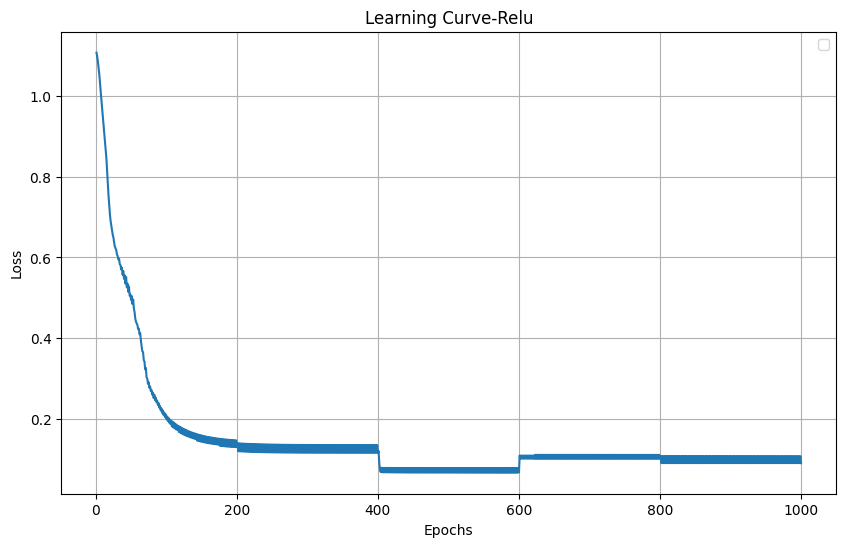

Number of Hidden Layers:  3, Neurons Per Layer: 4, 4, 2, Learning Rate: 0.03


In [ ]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt



# Had to rewrite the class for Neural Network, It did not want to work with the class I had created from scratch.
class NeuralNetwork:
    def __init__(self, hidden_layers = (100,), learning_rate = 0.001, max_iter = 200, random_state = 42):
        self.hidden_layers = hidden_layers
        self.learning_rate = learning_rate
        self.max_iter = max_iter
        self.random_state = random_state
        self.train_losses = []

# Load the data inside the class to make references easier
    def load_data(self):
        iris = load_iris()
        x, y = iris.data, iris.target
        return x, y

# Create the Model.  This was taken from Sklearn's Website
    def create_model(self):
        self.model = MLPClassifier(hidden_layer_sizes = self.hidden_layers, activation='relu',  learning_rate_init = self.learning_rate,max_iter = 1, warm_start = True,random_state = self.random_state)




# Cross Validation for Test and Training Accuracy Testing
# This too was taken from Sklearn's website in the Cross Validation Section
    def cross_validate(self, x, y, cv = 5):
        skf = StratifiedKFold(n_splits = cv, shuffle = True, random_state = self.random_state)
        scores = []
        for train_index, test_index in skf.split(x, y):
            X_train, X_test = x[train_index], x[test_index]
            y_train, y_test = y[train_index], y[test_index]
            self.train(X_train, y_train)
            score = self.model.score(X_test, y_test)
            scores.append(score)
        print(f"Cross-validation accuracy: {np.mean(scores):.4f}")
        return scores

# Train the Neural Network
    def train(self, X_train, y_train):
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        for _ in range(self.max_iter):
            self.model.fit(X_train_scaled, y_train)
            self.train_losses.append(self.model.loss_)

# Plot the Learning Curves for Comparisons
    def plot_learning_curve(self):
        plt.figure(figsize =( 10, 6))
        plt.plot(range(1, len(self.train_losses) + 1), self.train_losses)
        plt.xlabel("Epochs")
        plt.ylabel("Loss")
        plt.title(f"Learning Curve-Relu")
        plt.legend(loc="best")
        plt.grid()
        plt.show()


# Create the Neural Network
nn = NeuralNetwork(hidden_layers = (4, 4, 2), learning_rate = 0.03, max_iter = 200)
# Load the Data from the Iris Dataset
x, y = nn.load_data()
# Create the Model
nn.create_model()
# Cross Validate
nn.cross_validate(x, y)
# Plot the Learning Curve
nn.plot_learning_curve()

print("Number of Hidden Layers:  3, Neurons Per Layer: 4, 4, 2, Learning Rate: 0.03")



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691

Cross-validation accuracy: 0.3333


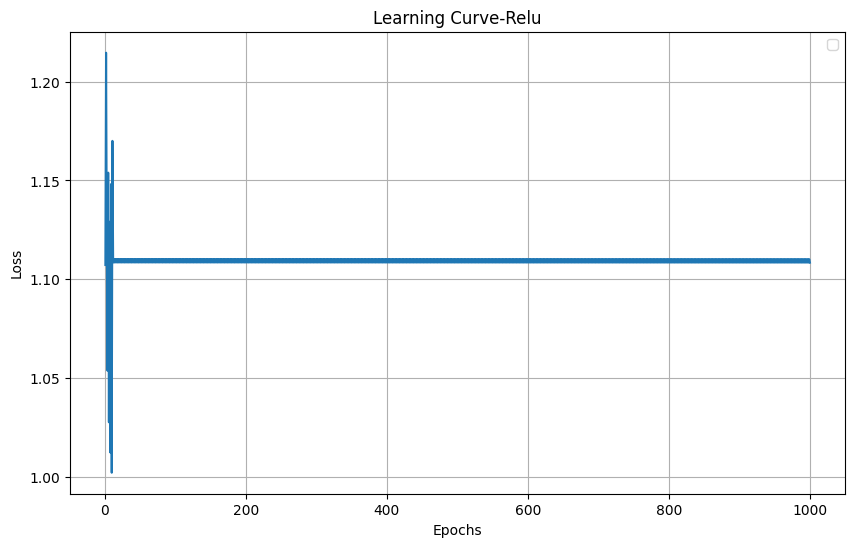

Number of Hidden Layers:  3, Neurons Per Layer: 4, 4, 2, Learning Rate: 0.3


In [ ]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt



# Had to rewrite the class for Neural Network, It did not want to work with the class I had created from scratch.
class NeuralNetwork:
    def __init__(self, hidden_layers = (100,), learning_rate = 0.001, max_iter = 200, random_state = 42):
        self.hidden_layers = hidden_layers
        self.learning_rate = learning_rate
        self.max_iter = max_iter
        self.random_state = random_state
        self.train_losses = []

# Load the data inside the class to make references easier
    def load_data(self):
        iris = load_iris()
        x, y = iris.data, iris.target
        return x, y

# Create the Model.  This was taken from Sklearn's Website
    def create_model(self):
        self.model = MLPClassifier(hidden_layer_sizes = self.hidden_layers, activation='relu',  learning_rate_init = self.learning_rate,max_iter = 1, warm_start = True,random_state = self.random_state)




# Cross Validation for Test and Training Accuracy Testing
# This too was taken from Sklearn's website in the Cross Validation Section
    def cross_validate(self, x, y, cv = 5):
        skf = StratifiedKFold(n_splits = cv, shuffle = True, random_state = self.random_state)
        scores = []
        for train_index, test_index in skf.split(x, y):
            X_train, X_test = x[train_index], x[test_index]
            y_train, y_test = y[train_index], y[test_index]
            self.train(X_train, y_train)
            score = self.model.score(X_test, y_test)
            scores.append(score)
        print(f"Cross-validation accuracy: {np.mean(scores):.4f}")
        return scores

# Train the Neural Network
    def train(self, X_train, y_train):
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        for _ in range(self.max_iter):
            self.model.fit(X_train_scaled, y_train)
            self.train_losses.append(self.model.loss_)

# Plot the Learning Curves for Comparisons
    def plot_learning_curve(self):
        plt.figure(figsize =( 10, 6))
        plt.plot(range(1, len(self.train_losses) + 1), self.train_losses)
        plt.xlabel("Epochs")
        plt.ylabel("Loss")
        plt.title(f"Learning Curve-Relu")
        plt.legend(loc="best")
        plt.grid()
        plt.show()


# Create the Neural Network
nn = NeuralNetwork(hidden_layers = (4, 4, 2), learning_rate = 0.3, max_iter = 200)
# Load the Data from the Iris Dataset
x, y = nn.load_data()
# Create the Model
nn.create_model()
# Cross Validate
nn.cross_validate(x, y)
# Plot the Learning Curve
nn.plot_learning_curve()

print("Number of Hidden Layers:  3, Neurons Per Layer: 4, 4, 2, Learning Rate: 0.3")



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691

Cross-validation accuracy: 0.3333


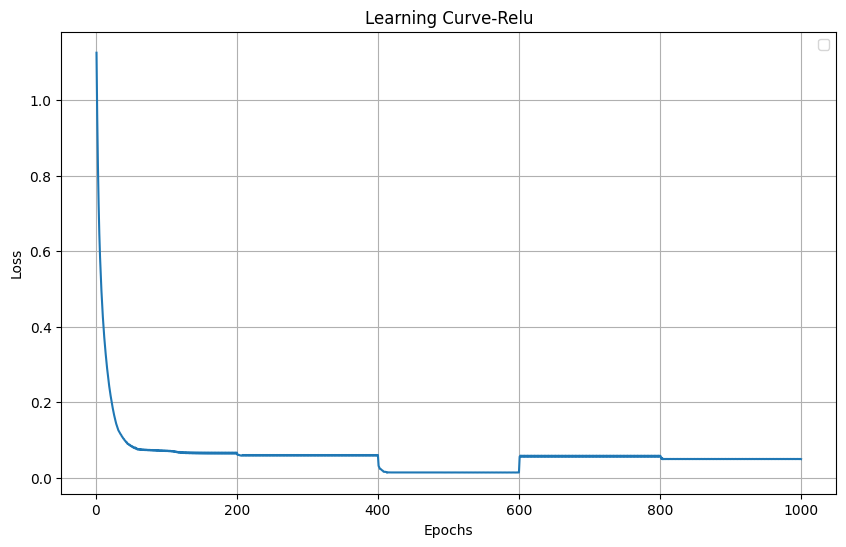

Number of Hidden Layers:  1, Neurons Per Layer: 5, Learning Rate: 0.03


In [ ]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt



# Had to rewrite the class for Neural Network, It did not want to work with the class I had created from scratch.
class NeuralNetwork:
    def __init__(self, hidden_layers = (100,), learning_rate = 0.001, max_iter = 200, random_state = 42):
        self.hidden_layers = hidden_layers
        self.learning_rate = learning_rate
        self.max_iter = max_iter
        self.random_state = random_state
        self.train_losses = []

# Load the data inside the class to make references easier
    def load_data(self):
        iris = load_iris()
        x, y = iris.data, iris.target
        return x, y

# Create the Model.  This was taken from Sklearn's Website
    def create_model(self):
        self.model = MLPClassifier(hidden_layer_sizes = self.hidden_layers, activation='relu',  learning_rate_init = self.learning_rate,max_iter = 1, warm_start = True,random_state = self.random_state)




# Cross Validation for Test and Training Accuracy Testing
# This too was taken from Sklearn's website in the Cross Validation Section
    def cross_validate(self, x, y, cv = 5):
        skf = StratifiedKFold(n_splits = cv, shuffle = True, random_state = self.random_state)
        scores = []
        for train_index, test_index in skf.split(x, y):
            X_train, X_test = x[train_index], x[test_index]
            y_train, y_test = y[train_index], y[test_index]
            self.train(X_train, y_train)
            score = self.model.score(X_test, y_test)
            scores.append(score)
        print(f"Cross-validation accuracy: {np.mean(scores):.4f}")
        return scores

# Train the Neural Network
    def train(self, X_train, y_train):
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        for _ in range(self.max_iter):
            self.model.fit(X_train_scaled, y_train)
            self.train_losses.append(self.model.loss_)

# Plot the Learning Curves for Comparisons
    def plot_learning_curve(self):
        plt.figure(figsize =( 10, 6))
        plt.plot(range(1, len(self.train_losses) + 1), self.train_losses)
        plt.xlabel("Epochs")
        plt.ylabel("Loss")
        plt.title(f"Learning Curve-Relu")
        plt.legend(loc="best")
        plt.grid()
        plt.show()


# Create the Neural Network
nn = NeuralNetwork(hidden_layers = (5), learning_rate = 0.03, max_iter = 200)
# Load the Data from the Iris Dataset
x, y = nn.load_data()
# Create the Model
nn.create_model()
# Cross Validate
nn.cross_validate(x, y)
# Plot the Learning Curve
nn.plot_learning_curve()

print("Number of Hidden Layers:  1, Neurons Per Layer: 5, Learning Rate: 0.03")



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691

Cross-validation accuracy: 0.3733


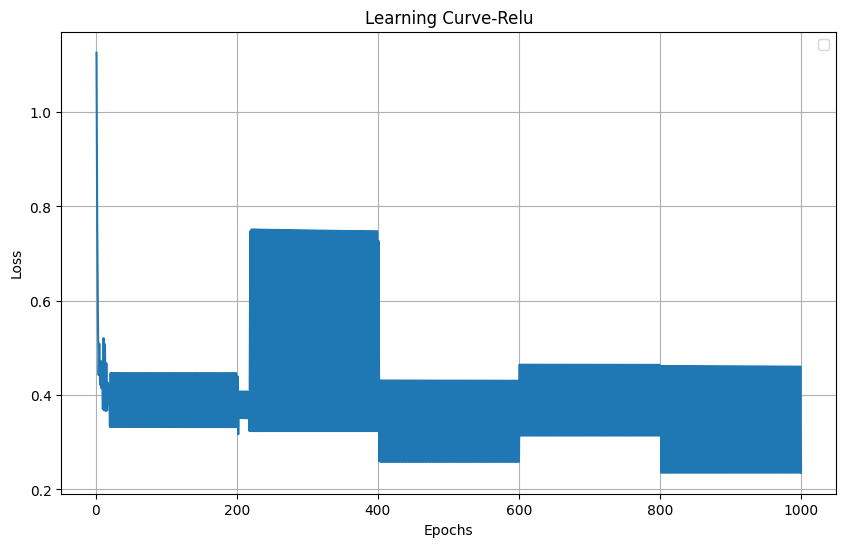

Number of Hidden Layers:  1, Neurons Per Layer: 5, Learning Rate: 0.3


In [ ]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt



# Had to rewrite the class for Neural Network, It did not want to work with the class I had created from scratch.
class NeuralNetwork:
    def __init__(self, hidden_layers = (100,), learning_rate = 0.001, max_iter = 200, random_state = 42):
        self.hidden_layers = hidden_layers
        self.learning_rate = learning_rate
        self.max_iter = max_iter
        self.random_state = random_state
        self.train_losses = []

# Load the data inside the class to make references easier
    def load_data(self):
        iris = load_iris()
        x, y = iris.data, iris.target
        return x, y

# Create the Model.  This was taken from Sklearn's Website
    def create_model(self):
        self.model = MLPClassifier(hidden_layer_sizes = self.hidden_layers, activation='relu',  learning_rate_init = self.learning_rate,max_iter = 1, warm_start = True,random_state = self.random_state)




# Cross Validation for Test and Training Accuracy Testing
# This too was taken from Sklearn's website in the Cross Validation Section
    def cross_validate(self, x, y, cv = 5):
        skf = StratifiedKFold(n_splits = cv, shuffle = True, random_state = self.random_state)
        scores = []
        for train_index, test_index in skf.split(x, y):
            X_train, X_test = x[train_index], x[test_index]
            y_train, y_test = y[train_index], y[test_index]
            self.train(X_train, y_train)
            score = self.model.score(X_test, y_test)
            scores.append(score)
        print(f"Cross-validation accuracy: {np.mean(scores):.4f}")
        return scores

# Train the Neural Network
    def train(self, X_train, y_train):
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        for _ in range(self.max_iter):
            self.model.fit(X_train_scaled, y_train)
            self.train_losses.append(self.model.loss_)

# Plot the Learning Curves for Comparisons
    def plot_learning_curve(self):
        plt.figure(figsize =( 10, 6))
        plt.plot(range(1, len(self.train_losses) + 1), self.train_losses)
        plt.xlabel("Epochs")
        plt.ylabel("Loss")
        plt.title(f"Learning Curve-Relu")
        plt.legend(loc="best")
        plt.grid()
        plt.show()


# Create the Neural Network
nn = NeuralNetwork(hidden_layers = (5), learning_rate = 0.3, max_iter = 200)
# Load the Data from the Iris Dataset
x, y = nn.load_data()
# Create the Model
nn.create_model()
# Cross Validate
nn.cross_validate(x, y)
# Plot the Learning Curve
nn.plot_learning_curve()

print("Number of Hidden Layers:  1, Neurons Per Layer: 5, Learning Rate: 0.3")



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691

Cross-validation accuracy: 0.3667


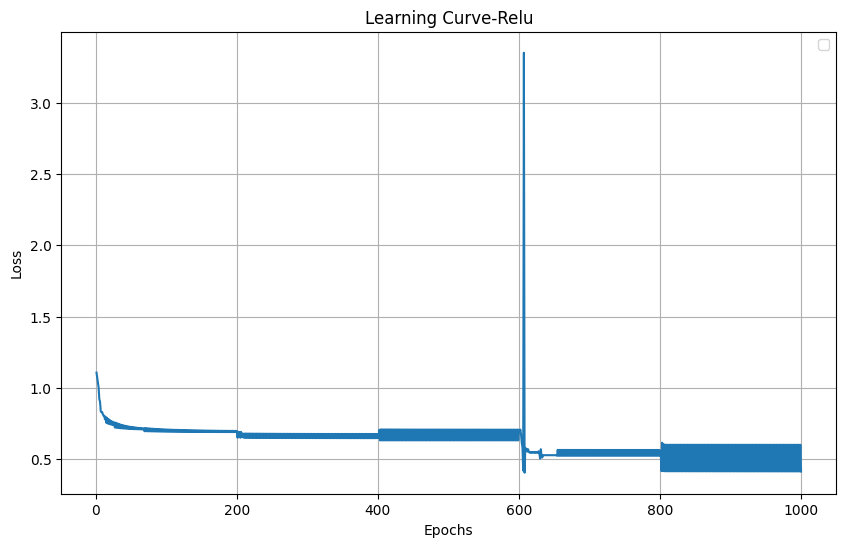

Number of Hidden Layers: 3, Neurons Per Layer: 4, 4, 2, Learning Rate: 0.1


In [ ]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt



# Had to rewrite the class for Neural Network, It did not want to work with the class I had created from scratch.
class NeuralNetwork:
    def __init__(self, hidden_layers = (100,), learning_rate = 0.001, max_iter = 200, random_state = 42):
        self.hidden_layers = hidden_layers
        self.learning_rate = learning_rate
        self.max_iter = max_iter
        self.random_state = random_state
        self.train_losses = []

# Load the data inside the class to make references easier
    def load_data(self):
        iris = load_iris()
        x, y = iris.data, iris.target
        return x, y

# Create the Model.  This was taken from Sklearn's Website
    def create_model(self):
        self.model = MLPClassifier(hidden_layer_sizes = self.hidden_layers, activation='relu',  learning_rate_init = self.learning_rate,max_iter = 1, warm_start = True,random_state = self.random_state)




# Cross Validation for Test and Training Accuracy Testing
# This too was taken from Sklearn's website in the Cross Validation Section
    def cross_validate(self, x, y, cv = 5):
        skf = StratifiedKFold(n_splits = cv, shuffle = True, random_state = self.random_state)
        scores = []
        for train_index, test_index in skf.split(x, y):
            X_train, X_test = x[train_index], x[test_index]
            y_train, y_test = y[train_index], y[test_index]
            self.train(X_train, y_train)
            score = self.model.score(X_test, y_test)
            scores.append(score)
        print(f"Cross-validation accuracy: {np.mean(scores):.4f}")
        return scores

# Train the Neural Network
    def train(self, X_train, y_train):
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        for _ in range(self.max_iter):
            self.model.fit(X_train_scaled, y_train)
            self.train_losses.append(self.model.loss_)

# Plot the Learning Curves for Comparisons
    def plot_learning_curve(self):
        plt.figure(figsize =( 10, 6))
        plt.plot(range(1, len(self.train_losses) + 1), self.train_losses)
        plt.xlabel("Epochs")
        plt.ylabel("Loss")
        plt.title(f"Learning Curve-Relu")
        plt.legend(loc="best")
        plt.grid()
        plt.show()


# Create the Neural Network
nn = NeuralNetwork(hidden_layers = (4, 4, 2), learning_rate = 0.1, max_iter = 200)
# Load the Data from the Iris Dataset
x, y = nn.load_data()
# Create the Model
nn.create_model()
# Cross Validate
nn.cross_validate(x, y)
# Plot the Learning Curve
nn.plot_learning_curve()

print("Number of Hidden Layers: 3, Neurons Per Layer: 4, 4, 2, Learning Rate: 0.1")



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691

Cross-validation accuracy: 0.3333


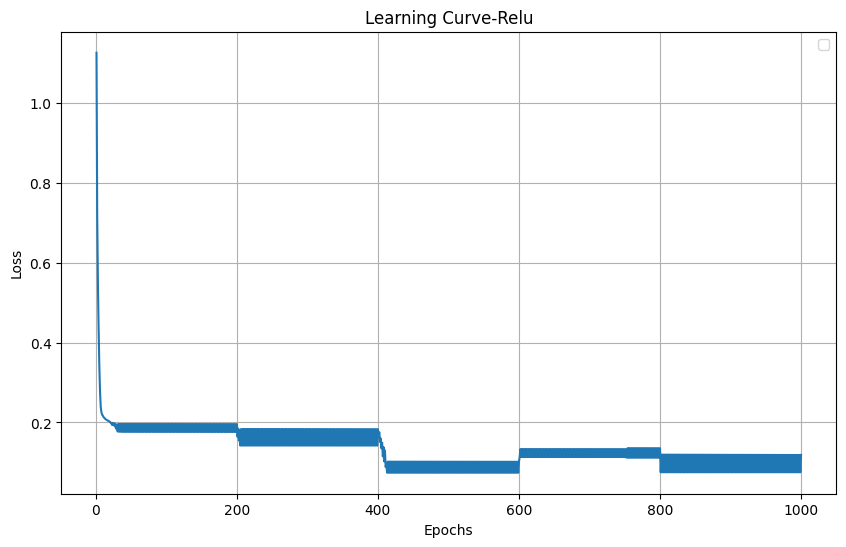

Number of Hidden Layers: 1, Neurons Per Layer: 5, Learning Rate: 0.1


In [ ]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt



# Had to rewrite the class for Neural Network, It did not want to work with the class I had created from scratch.
class NeuralNetwork:
    def __init__(self, hidden_layers = (100,), learning_rate = 0.001, max_iter = 200, random_state = 42):
        self.hidden_layers = hidden_layers
        self.learning_rate = learning_rate
        self.max_iter = max_iter
        self.random_state = random_state
        self.train_losses = []

# Load the data inside the class to make references easier
    def load_data(self):
        iris = load_iris()
        x, y = iris.data, iris.target
        return x, y

# Create the Model.  This was taken from Sklearn's Website
    def create_model(self):
        self.model = MLPClassifier(hidden_layer_sizes = self.hidden_layers, activation='relu',  learning_rate_init = self.learning_rate,max_iter = 1, warm_start = True,random_state = self.random_state)




# Cross Validation for Test and Training Accuracy Testing
# This too was taken from Sklearn's website in the Cross Validation Section
    def cross_validate(self, x, y, cv = 5):
        skf = StratifiedKFold(n_splits = cv, shuffle = True, random_state = self.random_state)
        scores = []
        for train_index, test_index in skf.split(x, y):
            X_train, X_test = x[train_index], x[test_index]
            y_train, y_test = y[train_index], y[test_index]
            self.train(X_train, y_train)
            score = self.model.score(X_test, y_test)
            scores.append(score)
        print(f"Cross-validation accuracy: {np.mean(scores):.4f}")
        return scores

# Train the Neural Network
    def train(self, X_train, y_train):
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        for _ in range(self.max_iter):
            self.model.fit(X_train_scaled, y_train)
            self.train_losses.append(self.model.loss_)

# Plot the Learning Curves for Comparisons
    def plot_learning_curve(self):
        plt.figure(figsize =( 10, 6))
        plt.plot(range(1, len(self.train_losses) + 1), self.train_losses)
        plt.xlabel("Epochs")
        plt.ylabel("Loss")
        plt.title(f"Learning Curve-Relu")
        plt.legend(loc="best")
        plt.grid()
        plt.show()


# Create the Neural Network
nn = NeuralNetwork(hidden_layers = (5), learning_rate = 0.1, max_iter = 200)
# Load the Data from the Iris Dataset
x, y = nn.load_data()
# Create the Model
nn.create_model()
# Cross Validate
nn.cross_validate(x, y)
# Plot the Learning Curve
nn.plot_learning_curve()

print("Number of Hidden Layers: 1, Neurons Per Layer: 5, Learning Rate: 0.1")



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691

Cross-validation accuracy: 0.3333


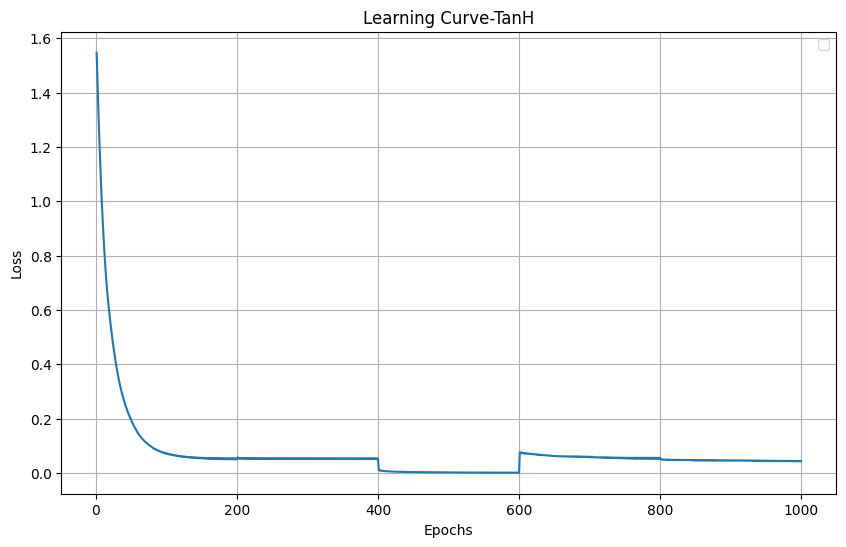

Number of Hidden Layers: 2, Neurons Per Layer: 5, 5, Learning Rate: 0.01


In [ ]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt



# Had to rewrite the class for Neural Network, It did not want to work with the class I had created from scratch.
class NeuralNetwork:
    def __init__(self, hidden_layers = (100,), learning_rate = 0.001, max_iter = 200, random_state = 42):
        self.hidden_layers = hidden_layers
        self.learning_rate = learning_rate
        self.max_iter = max_iter
        self.random_state = random_state
        self.train_losses = []

# Load the data inside the class to make references easier
    def load_data(self):
        iris = load_iris()
        x, y = iris.data, iris.target
        return x, y

# Create the Model.  This was taken from Sklearn's Website
    def create_model(self):
        self.model = MLPClassifier(hidden_layer_sizes = self.hidden_layers, activation='tanh',  learning_rate_init = self.learning_rate,max_iter = 1, warm_start = True,random_state = self.random_state)




# Cross Validation for Test and Training Accuracy Testing
# This too was taken from Sklearn's website in the Cross Validation Section
    def cross_validate(self, x, y, cv = 5):
        skf = StratifiedKFold(n_splits = cv, shuffle = True, random_state = self.random_state)
        scores = []
        for train_index, test_index in skf.split(x, y):
            X_train, X_test = x[train_index], x[test_index]
            y_train, y_test = y[train_index], y[test_index]
            self.train(X_train, y_train)
            score = self.model.score(X_test, y_test)
            scores.append(score)
        print(f"Cross-validation accuracy: {np.mean(scores):.4f}")
        return scores

# Train the Neural Network
    def train(self, X_train, y_train):
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        for _ in range(self.max_iter):
            self.model.fit(X_train_scaled, y_train)
            self.train_losses.append(self.model.loss_)

# Plot the Learning Curves for Comparisons
    def plot_learning_curve(self):
        plt.figure(figsize =( 10, 6))
        plt.plot(range(1, len(self.train_losses) + 1), self.train_losses)
        plt.xlabel("Epochs")
        plt.ylabel("Loss")
        plt.title(f"Learning Curve-TanH")
        plt.legend(loc="best")
        plt.grid()
        plt.show()


# Create the Neural Network
nn = NeuralNetwork(hidden_layers = (5, 5), learning_rate = 0.01, max_iter = 200)
# Load the Data from the Iris Dataset
x, y = nn.load_data()
# Create the Model
nn.create_model()
# Cross Validate
nn.cross_validate(x, y)
# Plot the Learning Curve
nn.plot_learning_curve()

print("Number of Hidden Layers: 2, Neurons Per Layer: 5, 5, Learning Rate: 0.01")



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691

Cross-validation accuracy: 0.3333


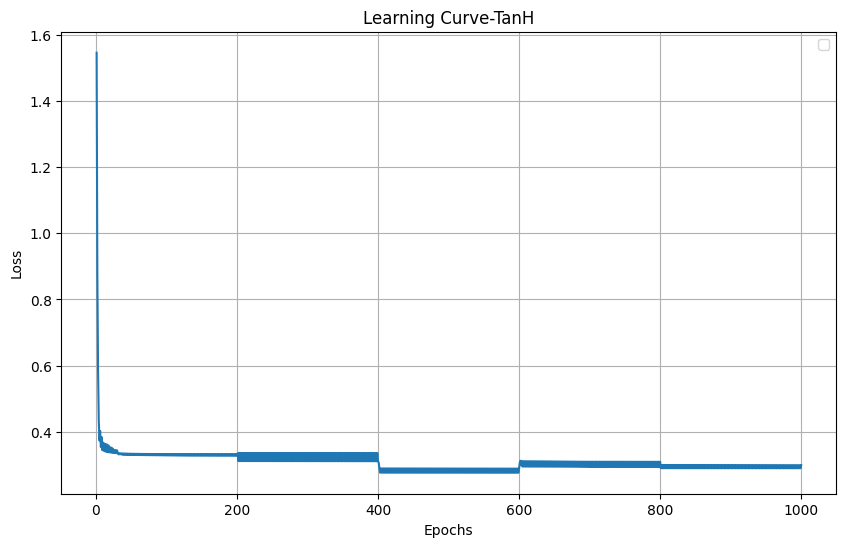

Number of Hidden Layers: 2, Neurons Per Layer: 5, 5, Learning Rate: 0.1


In [ ]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt



# Had to rewrite the class for Neural Network, It did not want to work with the class I had created from scratch.
class NeuralNetwork:
    def __init__(self, hidden_layers = (100,), learning_rate = 0.001, max_iter = 200, random_state = 42):
        self.hidden_layers = hidden_layers
        self.learning_rate = learning_rate
        self.max_iter = max_iter
        self.random_state = random_state
        self.train_losses = []

# Load the data inside the class to make references easier
    def load_data(self):
        iris = load_iris()
        x, y = iris.data, iris.target
        return x, y

# Create the Model.  This was taken from Sklearn's Website
    def create_model(self):
        self.model = MLPClassifier(hidden_layer_sizes = self.hidden_layers, activation='tanh',  learning_rate_init = self.learning_rate,max_iter = 1, warm_start = True,random_state = self.random_state)




# Cross Validation for Test and Training Accuracy Testing
# This too was taken from Sklearn's website in the Cross Validation Section
    def cross_validate(self, x, y, cv = 5):
        skf = StratifiedKFold(n_splits = cv, shuffle = True, random_state = self.random_state)
        scores = []
        for train_index, test_index in skf.split(x, y):
            X_train, X_test = x[train_index], x[test_index]
            y_train, y_test = y[train_index], y[test_index]
            self.train(X_train, y_train)
            score = self.model.score(X_test, y_test)
            scores.append(score)
        print(f"Cross-validation accuracy: {np.mean(scores):.4f}")
        return scores

# Train the Neural Network
    def train(self, X_train, y_train):
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        for _ in range(self.max_iter):
            self.model.fit(X_train_scaled, y_train)
            self.train_losses.append(self.model.loss_)

# Plot the Learning Curves for Comparisons
    def plot_learning_curve(self):
        plt.figure(figsize =( 10, 6))
        plt.plot(range(1, len(self.train_losses) + 1), self.train_losses)
        plt.xlabel("Epochs")
        plt.ylabel("Loss")
        plt.title(f"Learning Curve-TanH")
        plt.legend(loc="best")
        plt.grid()
        plt.show()


# Create the Neural Network
nn = NeuralNetwork(hidden_layers = (5, 5), learning_rate = 0.1, max_iter = 200)
# Load the Data from the Iris Dataset
x, y = nn.load_data()
# Create the Model
nn.create_model()
# Cross Validate
nn.cross_validate(x, y)
# Plot the Learning Curve
nn.plot_learning_curve()

print("Number of Hidden Layers: 2, Neurons Per Layer: 5, 5, Learning Rate: 0.1")



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691

Cross-validation accuracy: 0.5133


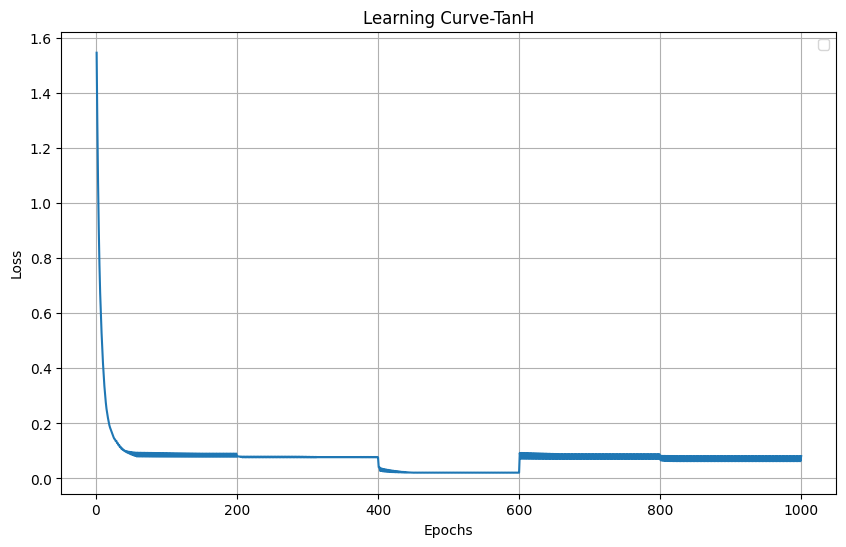

Number of Hidden Layers: 2, Neurons Per Layer: 5, 5, Learning Rate: 0.03


In [ ]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt



# Had to rewrite the class for Neural Network, It did not want to work with the class I had created from scratch.
class NeuralNetwork:
    def __init__(self, hidden_layers = (100,), learning_rate = 0.001, max_iter = 200, random_state = 42):
        self.hidden_layers = hidden_layers
        self.learning_rate = learning_rate
        self.max_iter = max_iter
        self.random_state = random_state
        self.train_losses = []

# Load the data inside the class to make references easier
    def load_data(self):
        iris = load_iris()
        x, y = iris.data, iris.target
        return x, y

# Create the Model.  This was taken from Sklearn's Website
    def create_model(self):
        self.model = MLPClassifier(hidden_layer_sizes = self.hidden_layers, activation='tanh',  learning_rate_init = self.learning_rate,max_iter = 1, warm_start = True,random_state = self.random_state)




# Cross Validation for Test and Training Accuracy Testing
# This too was taken from Sklearn's website in the Cross Validation Section
    def cross_validate(self, x, y, cv = 5):
        skf = StratifiedKFold(n_splits = cv, shuffle = True, random_state = self.random_state)
        scores = []
        for train_index, test_index in skf.split(x, y):
            X_train, X_test = x[train_index], x[test_index]
            y_train, y_test = y[train_index], y[test_index]
            self.train(X_train, y_train)
            score = self.model.score(X_test, y_test)
            scores.append(score)
        print(f"Cross-validation accuracy: {np.mean(scores):.4f}")
        return scores

# Train the Neural Network
    def train(self, X_train, y_train):
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        for _ in range(self.max_iter):
            self.model.fit(X_train_scaled, y_train)
            self.train_losses.append(self.model.loss_)

# Plot the Learning Curves for Comparisons
    def plot_learning_curve(self):
        plt.figure(figsize =( 10, 6))
        plt.plot(range(1, len(self.train_losses) + 1), self.train_losses)
        plt.xlabel("Epochs")
        plt.ylabel("Loss")
        plt.title(f"Learning Curve-TanH")
        plt.legend(loc="best")
        plt.grid()
        plt.show()


# Create the Neural Network
nn = NeuralNetwork(hidden_layers = (5, 5), learning_rate = 0.03, max_iter = 200)
# Load the Data from the Iris Dataset
x, y = nn.load_data()
# Create the Model
nn.create_model()
# Cross Validate
nn.cross_validate(x, y)
# Plot the Learning Curve
nn.plot_learning_curve()

print("Number of Hidden Layers: 2, Neurons Per Layer: 5, 5, Learning Rate: 0.03")



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691

Cross-validation accuracy: 0.3333


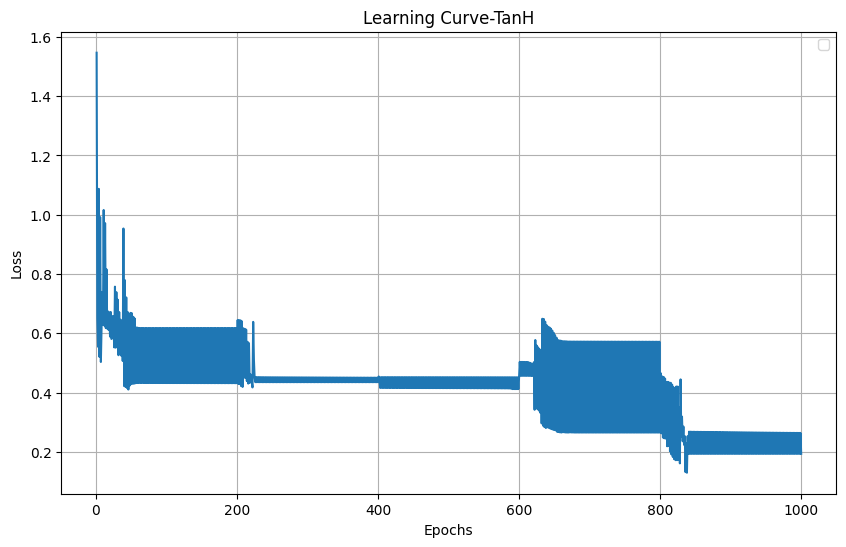

Number of Hidden Layers: 2, Neurons Per Layer: 5, 5, Learning Rate: 0.3


In [ ]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt



# Had to rewrite the class for Neural Network, It did not want to work with the class I had created from scratch.
class NeuralNetwork:
    def __init__(self, hidden_layers = (100,), learning_rate = 0.001, max_iter = 200, random_state = 42):
        self.hidden_layers = hidden_layers
        self.learning_rate = learning_rate
        self.max_iter = max_iter
        self.random_state = random_state
        self.train_losses = []

# Load the data inside the class to make references easier
    def load_data(self):
        iris = load_iris()
        x, y = iris.data, iris.target
        return x, y

# Create the Model.  This was taken from Sklearn's Website
    def create_model(self):
        self.model = MLPClassifier(hidden_layer_sizes = self.hidden_layers, activation='tanh',  learning_rate_init = self.learning_rate,max_iter = 1, warm_start = True,random_state = self.random_state)




# Cross Validation for Test and Training Accuracy Testing
# This too was taken from Sklearn's website in the Cross Validation Section
    def cross_validate(self, x, y, cv = 5):
        skf = StratifiedKFold(n_splits = cv, shuffle = True, random_state = self.random_state)
        scores = []
        for train_index, test_index in skf.split(x, y):
            X_train, X_test = x[train_index], x[test_index]
            y_train, y_test = y[train_index], y[test_index]
            self.train(X_train, y_train)
            score = self.model.score(X_test, y_test)
            scores.append(score)
        print(f"Cross-validation accuracy: {np.mean(scores):.4f}")
        return scores

# Train the Neural Network
    def train(self, X_train, y_train):
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        for _ in range(self.max_iter):
            self.model.fit(X_train_scaled, y_train)
            self.train_losses.append(self.model.loss_)

# Plot the Learning Curves for Comparisons
    def plot_learning_curve(self):
        plt.figure(figsize =( 10, 6))
        plt.plot(range(1, len(self.train_losses) + 1), self.train_losses)
        plt.xlabel("Epochs")
        plt.ylabel("Loss")
        plt.title(f"Learning Curve-TanH")
        plt.legend(loc="best")
        plt.grid()
        plt.show()


# Create the Neural Network
nn = NeuralNetwork(hidden_layers = (5, 5), learning_rate = 0.3, max_iter = 200)
# Load the Data from the Iris Dataset
x, y = nn.load_data()
# Create the Model
nn.create_model()
# Cross Validate
nn.cross_validate(x, y)
# Plot the Learning Curve
nn.plot_learning_curve()

print("Number of Hidden Layers: 2, Neurons Per Layer: 5, 5, Learning Rate: 0.3")



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691

Cross-validation accuracy: 0.4933


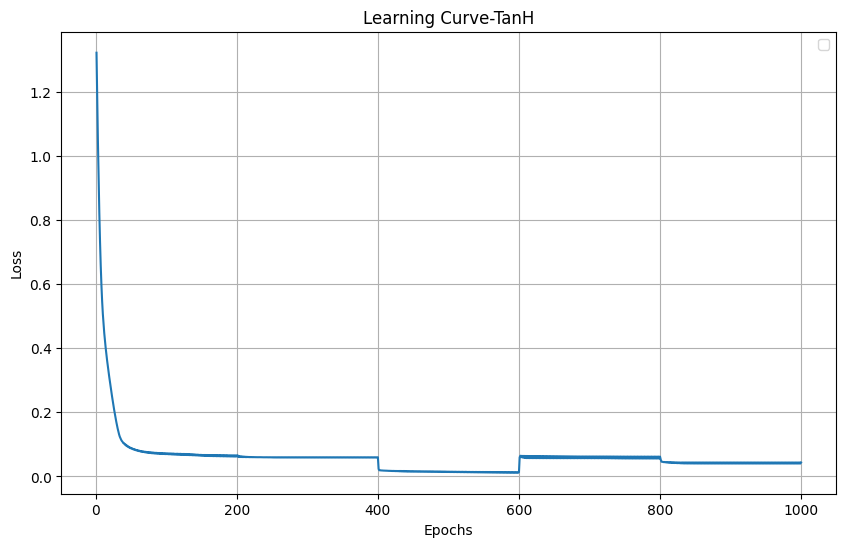

Number of Hidden Layers: 2, Neurons Per Layer: 10, 10,  Learning Rate: 0.01


In [ ]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt



# Had to rewrite the class for Neural Network, It did not want to work with the class I had created from scratch.
class NeuralNetwork:
    def __init__(self, hidden_layers = (100,), learning_rate = 0.001, max_iter = 200, random_state = 42):
        self.hidden_layers = hidden_layers
        self.learning_rate = learning_rate
        self.max_iter = max_iter
        self.random_state = random_state
        self.train_losses = []

# Load the data inside the class to make references easier
    def load_data(self):
        iris = load_iris()
        x, y = iris.data, iris.target
        return x, y

# Create the Model.  This was taken from Sklearn's Website
    def create_model(self):
        self.model = MLPClassifier(hidden_layer_sizes = self.hidden_layers, activation='tanh',  learning_rate_init = self.learning_rate,max_iter = 1, warm_start = True,random_state = self.random_state)




# Cross Validation for Test and Training Accuracy Testing
# This too was taken from Sklearn's website in the Cross Validation Section
    def cross_validate(self, x, y, cv = 5):
        skf = StratifiedKFold(n_splits = cv, shuffle = True, random_state = self.random_state)
        scores = []
        for train_index, test_index in skf.split(x, y):
            X_train, X_test = x[train_index], x[test_index]
            y_train, y_test = y[train_index], y[test_index]
            self.train(X_train, y_train)
            score = self.model.score(X_test, y_test)
            scores.append(score)
        print(f"Cross-validation accuracy: {np.mean(scores):.4f}")
        return scores

# Train the Neural Network
    def train(self, X_train, y_train):
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        for _ in range(self.max_iter):
            self.model.fit(X_train_scaled, y_train)
            self.train_losses.append(self.model.loss_)

# Plot the Learning Curves for Comparisons
    def plot_learning_curve(self):
        plt.figure(figsize =( 10, 6))
        plt.plot(range(1, len(self.train_losses) + 1), self.train_losses)
        plt.xlabel("Epochs")
        plt.ylabel("Loss")
        plt.title(f"Learning Curve-TanH")
        plt.legend(loc="best")
        plt.grid()
        plt.show()


# Create the Neural Network
nn = NeuralNetwork(hidden_layers = (10, 10), learning_rate = 0.01, max_iter = 200)
# Load the Data from the Iris Dataset
x, y = nn.load_data()
# Create the Model
nn.create_model()
# Cross Validate
nn.cross_validate(x, y)
# Plot the Learning Curve
nn.plot_learning_curve()

print("Number of Hidden Layers: 2, Neurons Per Layer: 10, 10,  Learning Rate: 0.01")



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691

Cross-validation accuracy: 0.3333


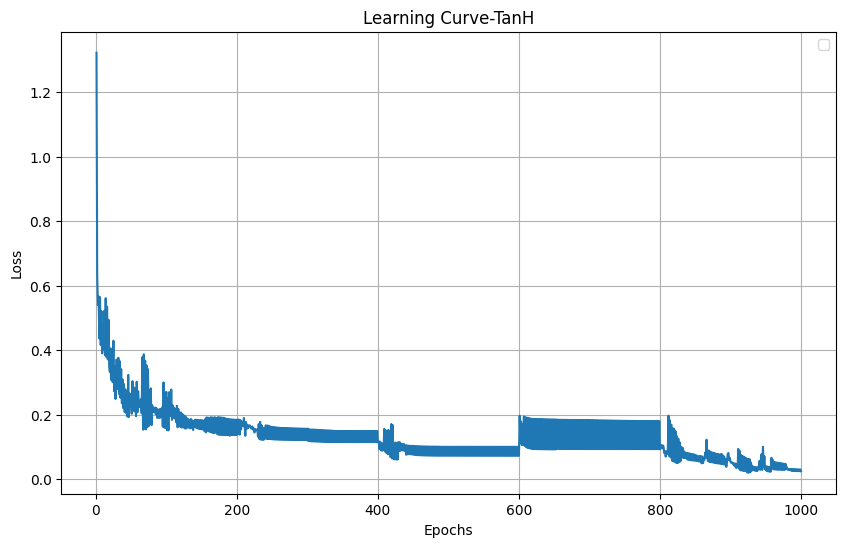

Number of Hidden Layers: 2, Neurons Per Layer: 10, 10,  Learning Rate: 0.1


In [ ]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt



# Had to rewrite the class for Neural Network, It did not want to work with the class I had created from scratch.
class NeuralNetwork:
    def __init__(self, hidden_layers = (100,), learning_rate = 0.001, max_iter = 200, random_state = 42):
        self.hidden_layers = hidden_layers
        self.learning_rate = learning_rate
        self.max_iter = max_iter
        self.random_state = random_state
        self.train_losses = []

# Load the data inside the class to make references easier
    def load_data(self):
        iris = load_iris()
        x, y = iris.data, iris.target
        return x, y

# Create the Model.  This was taken from Sklearn's Website
    def create_model(self):
        self.model = MLPClassifier(hidden_layer_sizes = self.hidden_layers, activation='tanh',  learning_rate_init = self.learning_rate,max_iter = 1, warm_start = True,random_state = self.random_state)




# Cross Validation for Test and Training Accuracy Testing
# This too was taken from Sklearn's website in the Cross Validation Section
    def cross_validate(self, x, y, cv = 5):
        skf = StratifiedKFold(n_splits = cv, shuffle = True, random_state = self.random_state)
        scores = []
        for train_index, test_index in skf.split(x, y):
            X_train, X_test = x[train_index], x[test_index]
            y_train, y_test = y[train_index], y[test_index]
            self.train(X_train, y_train)
            score = self.model.score(X_test, y_test)
            scores.append(score)
        print(f"Cross-validation accuracy: {np.mean(scores):.4f}")
        return scores

# Train the Neural Network
    def train(self, X_train, y_train):
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        for _ in range(self.max_iter):
            self.model.fit(X_train_scaled, y_train)
            self.train_losses.append(self.model.loss_)

# Plot the Learning Curves for Comparisons
    def plot_learning_curve(self):
        plt.figure(figsize =( 10, 6))
        plt.plot(range(1, len(self.train_losses) + 1), self.train_losses)
        plt.xlabel("Epochs")
        plt.ylabel("Loss")
        plt.title(f"Learning Curve-TanH")
        plt.legend(loc="best")
        plt.grid()
        plt.show()


# Create the Neural Network
nn = NeuralNetwork(hidden_layers = (10, 10), learning_rate = 0.1, max_iter = 200)
# Load the Data from the Iris Dataset
x, y = nn.load_data()
# Create the Model
nn.create_model()
# Cross Validate
nn.cross_validate(x, y)
# Plot the Learning Curve
nn.plot_learning_curve()

print("Number of Hidden Layers: 2, Neurons Per Layer: 10, 10,  Learning Rate: 0.1")



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691

Cross-validation accuracy: 0.6933


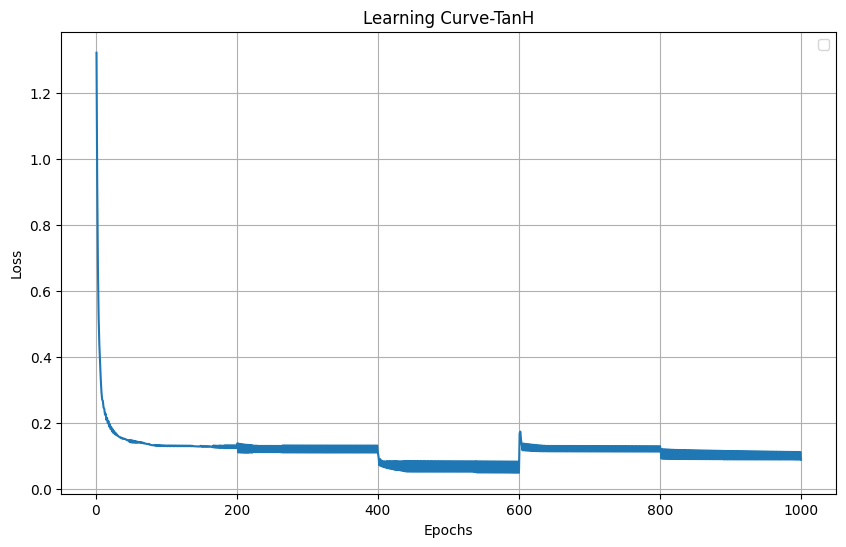

Number of Hidden Layers: 2, Neurons Per Layer: 10, 10,  Learning Rate: 0.03


In [ ]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt



# Had to rewrite the class for Neural Network, It did not want to work with the class I had created from scratch.
class NeuralNetwork:
    def __init__(self, hidden_layers = (100,), learning_rate = 0.001, max_iter = 200, random_state = 42):
        self.hidden_layers = hidden_layers
        self.learning_rate = learning_rate
        self.max_iter = max_iter
        self.random_state = random_state
        self.train_losses = []

# Load the data inside the class to make references easier
    def load_data(self):
        iris = load_iris()
        x, y = iris.data, iris.target
        return x, y

# Create the Model.  This was taken from Sklearn's Website
    def create_model(self):
        self.model = MLPClassifier(hidden_layer_sizes = self.hidden_layers, activation='tanh',  learning_rate_init = self.learning_rate,max_iter = 1, warm_start = True,random_state = self.random_state)




# Cross Validation for Test and Training Accuracy Testing
# This too was taken from Sklearn's website in the Cross Validation Section
    def cross_validate(self, x, y, cv = 5):
        skf = StratifiedKFold(n_splits = cv, shuffle = True, random_state = self.random_state)
        scores = []
        for train_index, test_index in skf.split(x, y):
            X_train, X_test = x[train_index], x[test_index]
            y_train, y_test = y[train_index], y[test_index]
            self.train(X_train, y_train)
            score = self.model.score(X_test, y_test)
            scores.append(score)
        print(f"Cross-validation accuracy: {np.mean(scores):.4f}")
        return scores

# Train the Neural Network
    def train(self, X_train, y_train):
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        for _ in range(self.max_iter):
            self.model.fit(X_train_scaled, y_train)
            self.train_losses.append(self.model.loss_)

# Plot the Learning Curves for Comparisons
    def plot_learning_curve(self):
        plt.figure(figsize =( 10, 6))
        plt.plot(range(1, len(self.train_losses) + 1), self.train_losses)
        plt.xlabel("Epochs")
        plt.ylabel("Loss")
        plt.title(f"Learning Curve-TanH")
        plt.legend(loc="best")
        plt.grid()
        plt.show()


# Create the Neural Network
nn = NeuralNetwork(hidden_layers = (10, 10), learning_rate = 0.03, max_iter = 200)
# Load the Data from the Iris Dataset
x, y = nn.load_data()
# Create the Model
nn.create_model()
# Cross Validate
nn.cross_validate(x, y)
# Plot the Learning Curve
nn.plot_learning_curve()

print("Number of Hidden Layers: 2, Neurons Per Layer: 10, 10,  Learning Rate: 0.03")



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691

Cross-validation accuracy: 0.3533


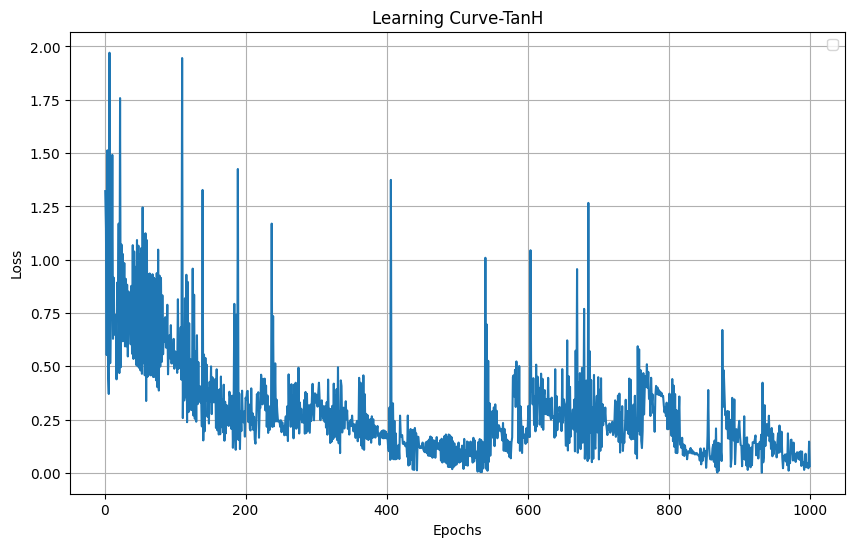

Number of Hidden Layers: 2, Neurons Per Layer: 10, 10,  Learning Rate: 0.3


In [ ]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt



# Had to rewrite the class for Neural Network, It did not want to work with the class I had created from scratch.
class NeuralNetwork:
    def __init__(self, hidden_layers = (100,), learning_rate = 0.001, max_iter = 200, random_state = 42):
        self.hidden_layers = hidden_layers
        self.learning_rate = learning_rate
        self.max_iter = max_iter
        self.random_state = random_state
        self.train_losses = []

# Load the data inside the class to make references easier
    def load_data(self):
        iris = load_iris()
        x, y = iris.data, iris.target
        return x, y

# Create the Model.  This was taken from Sklearn's Website
    def create_model(self):
        self.model = MLPClassifier(hidden_layer_sizes = self.hidden_layers, activation='tanh',  learning_rate_init = self.learning_rate,max_iter = 1, warm_start = True,random_state = self.random_state)




# Cross Validation for Test and Training Accuracy Testing
# This too was taken from Sklearn's website in the Cross Validation Section
    def cross_validate(self, x, y, cv = 5):
        skf = StratifiedKFold(n_splits = cv, shuffle = True, random_state = self.random_state)
        scores = []
        for train_index, test_index in skf.split(x, y):
            X_train, X_test = x[train_index], x[test_index]
            y_train, y_test = y[train_index], y[test_index]
            self.train(X_train, y_train)
            score = self.model.score(X_test, y_test)
            scores.append(score)
        print(f"Cross-validation accuracy: {np.mean(scores):.4f}")
        return scores

# Train the Neural Network
    def train(self, X_train, y_train):
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        for _ in range(self.max_iter):
            self.model.fit(X_train_scaled, y_train)
            self.train_losses.append(self.model.loss_)

# Plot the Learning Curves for Comparisons
    def plot_learning_curve(self):
        plt.figure(figsize =( 10, 6))
        plt.plot(range(1, len(self.train_losses) + 1), self.train_losses)
        plt.xlabel("Epochs")
        plt.ylabel("Loss")
        plt.title(f"Learning Curve-TanH")
        plt.legend(loc="best")
        plt.grid()
        plt.show()


# Create the Neural Network
nn = NeuralNetwork(hidden_layers = (10, 10), learning_rate = 0.3, max_iter = 200)
# Load the Data from the Iris Dataset
x, y = nn.load_data()
# Create the Model
nn.create_model()
# Cross Validate
nn.cross_validate(x, y)
# Plot the Learning Curve
nn.plot_learning_curve()

print("Number of Hidden Layers: 2, Neurons Per Layer: 10, 10,  Learning Rate: 0.3")



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691

Cross-validation accuracy: 0.6000


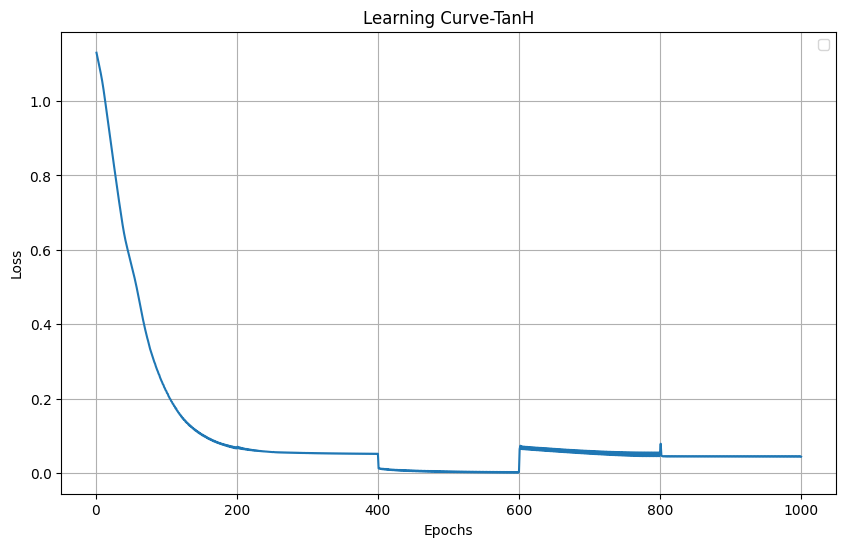

Number of Hidden Layers: 3, Neurons Per Layer: 4, 4, 2,  Learning Rate: 0.01


In [ ]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt



# Had to rewrite the class for Neural Network, It did not want to work with the class I had created from scratch.
class NeuralNetwork:
    def __init__(self, hidden_layers = (100,), learning_rate = 0.001, max_iter = 200, random_state = 42):
        self.hidden_layers = hidden_layers
        self.learning_rate = learning_rate
        self.max_iter = max_iter
        self.random_state = random_state
        self.train_losses = []

# Load the data inside the class to make references easier
    def load_data(self):
        iris = load_iris()
        x, y = iris.data, iris.target
        return x, y

# Create the Model.  This was taken from Sklearn's Website
    def create_model(self):
        self.model = MLPClassifier(hidden_layer_sizes = self.hidden_layers, activation='tanh',  learning_rate_init = self.learning_rate,max_iter = 1, warm_start = True,random_state = self.random_state)




# Cross Validation for Test and Training Accuracy Testing
# This too was taken from Sklearn's website in the Cross Validation Section
    def cross_validate(self, x, y, cv = 5):
        skf = StratifiedKFold(n_splits = cv, shuffle = True, random_state = self.random_state)
        scores = []
        for train_index, test_index in skf.split(x, y):
            X_train, X_test = x[train_index], x[test_index]
            y_train, y_test = y[train_index], y[test_index]
            self.train(X_train, y_train)
            score = self.model.score(X_test, y_test)
            scores.append(score)
        print(f"Cross-validation accuracy: {np.mean(scores):.4f}")
        return scores

# Train the Neural Network
    def train(self, X_train, y_train):
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        for _ in range(self.max_iter):
            self.model.fit(X_train_scaled, y_train)
            self.train_losses.append(self.model.loss_)

# Plot the Learning Curves for Comparisons
    def plot_learning_curve(self):
        plt.figure(figsize =( 10, 6))
        plt.plot(range(1, len(self.train_losses) + 1), self.train_losses)
        plt.xlabel("Epochs")
        plt.ylabel("Loss")
        plt.title(f"Learning Curve-TanH")
        plt.legend(loc="best")
        plt.grid()
        plt.show()


# Create the Neural Network
nn = NeuralNetwork(hidden_layers = (4, 4, 2), learning_rate = 0.01, max_iter = 200)
# Load the Data from the Iris Dataset
x, y = nn.load_data()
# Create the Model
nn.create_model()
# Cross Validate
nn.cross_validate(x, y)
# Plot the Learning Curve
nn.plot_learning_curve()

print("Number of Hidden Layers: 3, Neurons Per Layer: 4, 4, 2,  Learning Rate: 0.01")



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691

Cross-validation accuracy: 0.3333


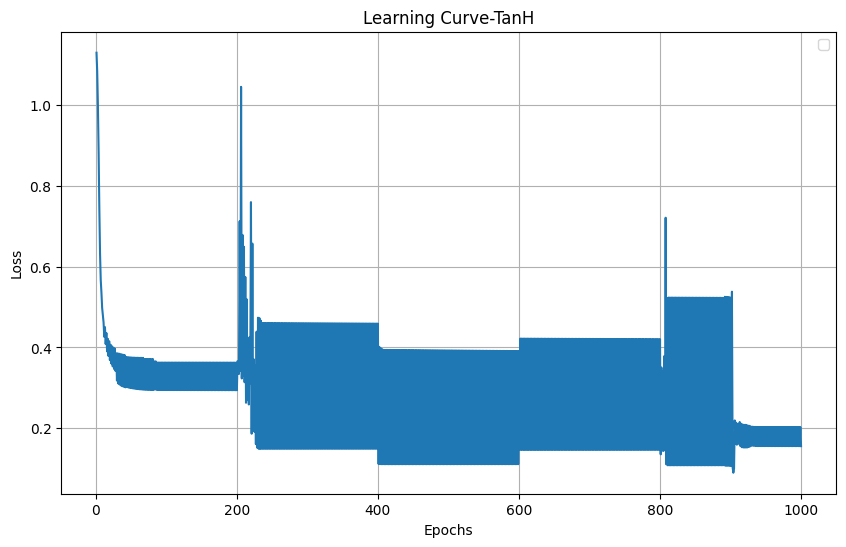

Number of Hidden Layers: 3, Neurons Per Layer: 4, 4, 2,  Learning Rate: 0.1


In [ ]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt



# Had to rewrite the class for Neural Network, It did not want to work with the class I had created from scratch.
class NeuralNetwork:
    def __init__(self, hidden_layers = (100,), learning_rate = 0.001, max_iter = 200, random_state = 42):
        self.hidden_layers = hidden_layers
        self.learning_rate = learning_rate
        self.max_iter = max_iter
        self.random_state = random_state
        self.train_losses = []

# Load the data inside the class to make references easier
    def load_data(self):
        iris = load_iris()
        x, y = iris.data, iris.target
        return x, y

# Create the Model.  This was taken from Sklearn's Website
    def create_model(self):
        self.model = MLPClassifier(hidden_layer_sizes = self.hidden_layers, activation='tanh',  learning_rate_init = self.learning_rate,max_iter = 1, warm_start = True,random_state = self.random_state)




# Cross Validation for Test and Training Accuracy Testing
# This too was taken from Sklearn's website in the Cross Validation Section
    def cross_validate(self, x, y, cv = 5):
        skf = StratifiedKFold(n_splits = cv, shuffle = True, random_state = self.random_state)
        scores = []
        for train_index, test_index in skf.split(x, y):
            X_train, X_test = x[train_index], x[test_index]
            y_train, y_test = y[train_index], y[test_index]
            self.train(X_train, y_train)
            score = self.model.score(X_test, y_test)
            scores.append(score)
        print(f"Cross-validation accuracy: {np.mean(scores):.4f}")
        return scores

# Train the Neural Network
    def train(self, X_train, y_train):
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        for _ in range(self.max_iter):
            self.model.fit(X_train_scaled, y_train)
            self.train_losses.append(self.model.loss_)

# Plot the Learning Curves for Comparisons
    def plot_learning_curve(self):
        plt.figure(figsize =( 10, 6))
        plt.plot(range(1, len(self.train_losses) + 1), self.train_losses)
        plt.xlabel("Epochs")
        plt.ylabel("Loss")
        plt.title(f"Learning Curve-TanH")
        plt.legend(loc="best")
        plt.grid()
        plt.show()


# Create the Neural Network
nn = NeuralNetwork(hidden_layers = (4, 4, 2), learning_rate = 0.1, max_iter = 200)
# Load the Data from the Iris Dataset
x, y = nn.load_data()
# Create the Model
nn.create_model()
# Cross Validate
nn.cross_validate(x, y)
# Plot the Learning Curve
nn.plot_learning_curve()

print("Number of Hidden Layers: 3, Neurons Per Layer: 4, 4, 2,  Learning Rate: 0.1")



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691

Cross-validation accuracy: 0.4000


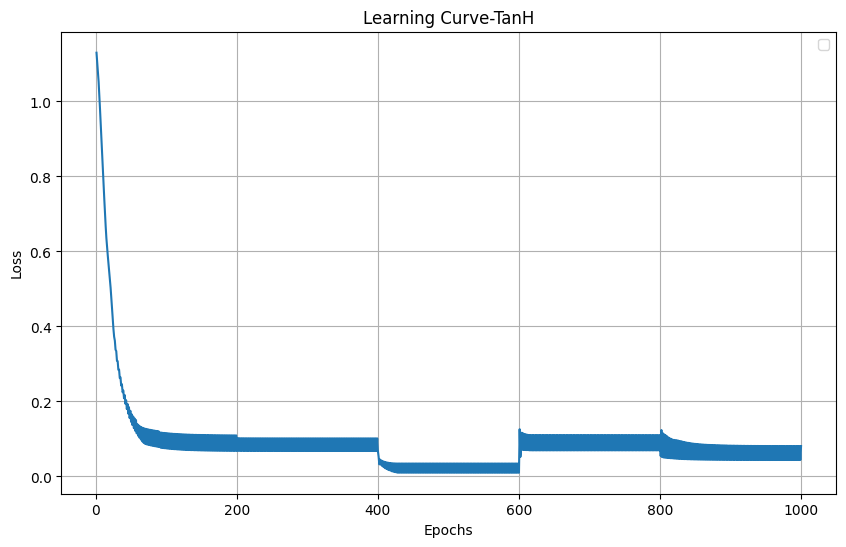

Number of Hidden Layers: 3, Neurons Per Layer: 4, 4, 2,  Learning Rate: 0.03


In [ ]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt



# Had to rewrite the class for Neural Network, It did not want to work with the class I had created from scratch.
class NeuralNetwork:
    def __init__(self, hidden_layers = (100,), learning_rate = 0.001, max_iter = 200, random_state = 42):
        self.hidden_layers = hidden_layers
        self.learning_rate = learning_rate
        self.max_iter = max_iter
        self.random_state = random_state
        self.train_losses = []

# Load the data inside the class to make references easier
    def load_data(self):
        iris = load_iris()
        x, y = iris.data, iris.target
        return x, y

# Create the Model.  This was taken from Sklearn's Website
    def create_model(self):
        self.model = MLPClassifier(hidden_layer_sizes = self.hidden_layers, activation='tanh',  learning_rate_init = self.learning_rate,max_iter = 1, warm_start = True,random_state = self.random_state)




# Cross Validation for Test and Training Accuracy Testing
# This too was taken from Sklearn's website in the Cross Validation Section
    def cross_validate(self, x, y, cv = 5):
        skf = StratifiedKFold(n_splits = cv, shuffle = True, random_state = self.random_state)
        scores = []
        for train_index, test_index in skf.split(x, y):
            X_train, X_test = x[train_index], x[test_index]
            y_train, y_test = y[train_index], y[test_index]
            self.train(X_train, y_train)
            score = self.model.score(X_test, y_test)
            scores.append(score)
        print(f"Cross-validation accuracy: {np.mean(scores):.4f}")
        return scores

# Train the Neural Network
    def train(self, X_train, y_train):
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        for _ in range(self.max_iter):
            self.model.fit(X_train_scaled, y_train)
            self.train_losses.append(self.model.loss_)

# Plot the Learning Curves for Comparisons
    def plot_learning_curve(self):
        plt.figure(figsize =( 10, 6))
        plt.plot(range(1, len(self.train_losses) + 1), self.train_losses)
        plt.xlabel("Epochs")
        plt.ylabel("Loss")
        plt.title(f"Learning Curve-TanH")
        plt.legend(loc="best")
        plt.grid()
        plt.show()


# Create the Neural Network
nn = NeuralNetwork(hidden_layers = (4, 4, 2), learning_rate = 0.03, max_iter = 200)
# Load the Data from the Iris Dataset
x, y = nn.load_data()
# Create the Model
nn.create_model()
# Cross Validate
nn.cross_validate(x, y)
# Plot the Learning Curve
nn.plot_learning_curve()

print("Number of Hidden Layers: 3, Neurons Per Layer: 4, 4, 2,  Learning Rate: 0.03")



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691

Cross-validation accuracy: 0.3333


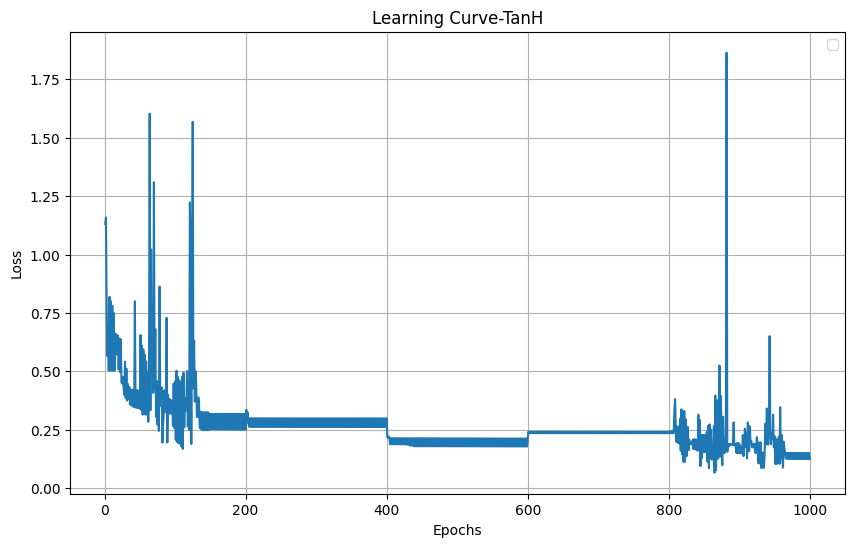

Number of Hidden Layers: 3, Neurons Per Layer: 4, 4, 2,  Learning Rate: 0.3


In [ ]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt



# Had to rewrite the class for Neural Network, It did not want to work with the class I had created from scratch.
class NeuralNetwork:
    def __init__(self, hidden_layers = (100,), learning_rate = 0.001, max_iter = 200, random_state = 42):
        self.hidden_layers = hidden_layers
        self.learning_rate = learning_rate
        self.max_iter = max_iter
        self.random_state = random_state
        self.train_losses = []

# Load the data inside the class to make references easier
    def load_data(self):
        iris = load_iris()
        x, y = iris.data, iris.target
        return x, y

# Create the Model.  This was taken from Sklearn's Website
    def create_model(self):
        self.model = MLPClassifier(hidden_layer_sizes = self.hidden_layers, activation='tanh',  learning_rate_init = self.learning_rate,max_iter = 1, warm_start = True,random_state = self.random_state)




# Cross Validation for Test and Training Accuracy Testing
# This too was taken from Sklearn's website in the Cross Validation Section
    def cross_validate(self, x, y, cv = 5):
        skf = StratifiedKFold(n_splits = cv, shuffle = True, random_state = self.random_state)
        scores = []
        for train_index, test_index in skf.split(x, y):
            X_train, X_test = x[train_index], x[test_index]
            y_train, y_test = y[train_index], y[test_index]
            self.train(X_train, y_train)
            score = self.model.score(X_test, y_test)
            scores.append(score)
        print(f"Cross-validation accuracy: {np.mean(scores):.4f}")
        return scores

# Train the Neural Network
    def train(self, X_train, y_train):
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        for _ in range(self.max_iter):
            self.model.fit(X_train_scaled, y_train)
            self.train_losses.append(self.model.loss_)

# Plot the Learning Curves for Comparisons
    def plot_learning_curve(self):
        plt.figure(figsize =( 10, 6))
        plt.plot(range(1, len(self.train_losses) + 1), self.train_losses)
        plt.xlabel("Epochs")
        plt.ylabel("Loss")
        plt.title(f"Learning Curve-TanH")
        plt.legend(loc="best")
        plt.grid()
        plt.show()


# Create the Neural Network
nn = NeuralNetwork(hidden_layers = (4, 4, 2), learning_rate = 0.3, max_iter = 200)
# Load the Data from the Iris Dataset
x, y = nn.load_data()
# Create the Model
nn.create_model()
# Cross Validate
nn.cross_validate(x, y)
# Plot the Learning Curve
nn.plot_learning_curve()

print("Number of Hidden Layers: 3, Neurons Per Layer: 4, 4, 2,  Learning Rate: 0.3")



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691

Cross-validation accuracy: 0.3333


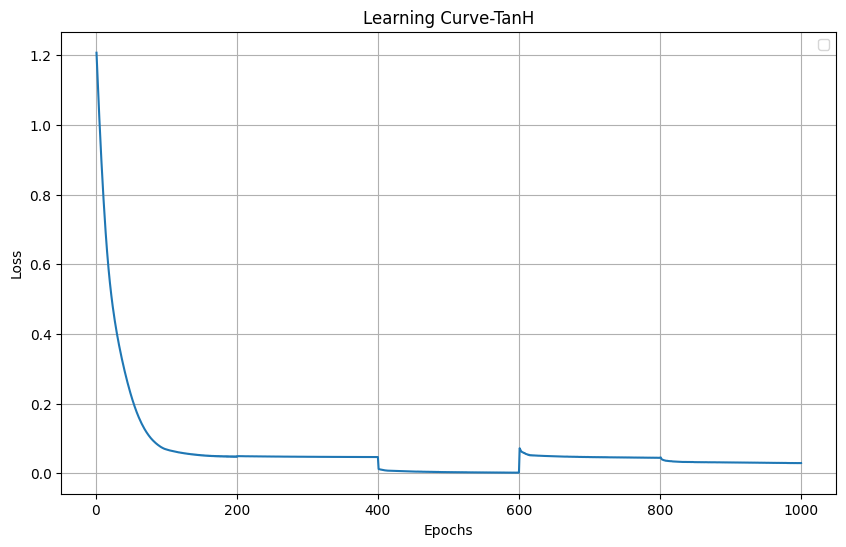

Number of Hidden Layers: 1, Neurons Per Layer: 5,  Learning Rate: 0.01


In [ ]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt



# Had to rewrite the class for Neural Network, It did not want to work with the class I had created from scratch.
class NeuralNetwork:
    def __init__(self, hidden_layers = (100,), learning_rate = 0.001, max_iter = 200, random_state = 42):
        self.hidden_layers = hidden_layers
        self.learning_rate = learning_rate
        self.max_iter = max_iter
        self.random_state = random_state
        self.train_losses = []

# Load the data inside the class to make references easier
    def load_data(self):
        iris = load_iris()
        x, y = iris.data, iris.target
        return x, y

# Create the Model.  This was taken from Sklearn's Website
    def create_model(self):
        self.model = MLPClassifier(hidden_layer_sizes = self.hidden_layers, activation='tanh',  learning_rate_init = self.learning_rate,max_iter = 1, warm_start = True,random_state = self.random_state)




# Cross Validation for Test and Training Accuracy Testing
# This too was taken from Sklearn's website in the Cross Validation Section
    def cross_validate(self, x, y, cv = 5):
        skf = StratifiedKFold(n_splits = cv, shuffle = True, random_state = self.random_state)
        scores = []
        for train_index, test_index in skf.split(x, y):
            X_train, X_test = x[train_index], x[test_index]
            y_train, y_test = y[train_index], y[test_index]
            self.train(X_train, y_train)
            score = self.model.score(X_test, y_test)
            scores.append(score)
        print(f"Cross-validation accuracy: {np.mean(scores):.4f}")
        return scores

# Train the Neural Network
    def train(self, X_train, y_train):
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        for _ in range(self.max_iter):
            self.model.fit(X_train_scaled, y_train)
            self.train_losses.append(self.model.loss_)

# Plot the Learning Curves for Comparisons
    def plot_learning_curve(self):
        plt.figure(figsize =( 10, 6))
        plt.plot(range(1, len(self.train_losses) + 1), self.train_losses)
        plt.xlabel("Epochs")
        plt.ylabel("Loss")
        plt.title(f"Learning Curve-TanH")
        plt.legend(loc="best")
        plt.grid()
        plt.show()


# Create the Neural Network
nn = NeuralNetwork(hidden_layers = (5), learning_rate = 0.01, max_iter = 200)
# Load the Data from the Iris Dataset
x, y = nn.load_data()
# Create the Model
nn.create_model()
# Cross Validate
nn.cross_validate(x, y)
# Plot the Learning Curve
nn.plot_learning_curve()

print("Number of Hidden Layers: 1, Neurons Per Layer: 5,  Learning Rate: 0.01")



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691

Cross-validation accuracy: 0.3333


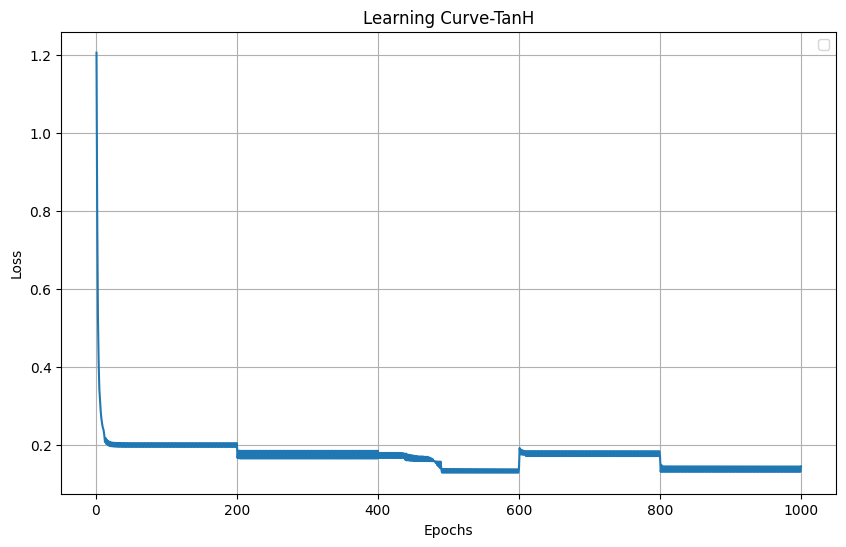

Number of Hidden Layers: 1, Neurons Per Layer: 5,  Learning Rate: 0.1


In [ ]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt



# Had to rewrite the class for Neural Network, It did not want to work with the class I had created from scratch.
class NeuralNetwork:
    def __init__(self, hidden_layers = (100,), learning_rate = 0.001, max_iter = 200, random_state = 42):
        self.hidden_layers = hidden_layers
        self.learning_rate = learning_rate
        self.max_iter = max_iter
        self.random_state = random_state
        self.train_losses = []

# Load the data inside the class to make references easier
    def load_data(self):
        iris = load_iris()
        x, y = iris.data, iris.target
        return x, y

# Create the Model.  This was taken from Sklearn's Website
    def create_model(self):
        self.model = MLPClassifier(hidden_layer_sizes = self.hidden_layers, activation='tanh',  learning_rate_init = self.learning_rate,max_iter = 1, warm_start = True,random_state = self.random_state)




# Cross Validation for Test and Training Accuracy Testing
# This too was taken from Sklearn's website in the Cross Validation Section
    def cross_validate(self, x, y, cv = 5):
        skf = StratifiedKFold(n_splits = cv, shuffle = True, random_state = self.random_state)
        scores = []
        for train_index, test_index in skf.split(x, y):
            X_train, X_test = x[train_index], x[test_index]
            y_train, y_test = y[train_index], y[test_index]
            self.train(X_train, y_train)
            score = self.model.score(X_test, y_test)
            scores.append(score)
        print(f"Cross-validation accuracy: {np.mean(scores):.4f}")
        return scores

# Train the Neural Network
    def train(self, X_train, y_train):
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        for _ in range(self.max_iter):
            self.model.fit(X_train_scaled, y_train)
            self.train_losses.append(self.model.loss_)

# Plot the Learning Curves for Comparisons
    def plot_learning_curve(self):
        plt.figure(figsize =( 10, 6))
        plt.plot(range(1, len(self.train_losses) + 1), self.train_losses)
        plt.xlabel("Epochs")
        plt.ylabel("Loss")
        plt.title(f"Learning Curve-TanH")
        plt.legend(loc="best")
        plt.grid()
        plt.show()


# Create the Neural Network
nn = NeuralNetwork(hidden_layers = (5), learning_rate = 0.1, max_iter = 200)
# Load the Data from the Iris Dataset
x, y = nn.load_data()
# Create the Model
nn.create_model()
# Cross Validate
nn.cross_validate(x, y)
# Plot the Learning Curve
nn.plot_learning_curve()

print("Number of Hidden Layers: 1, Neurons Per Layer: 5,  Learning Rate: 0.1")



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691

Cross-validation accuracy: 0.3333


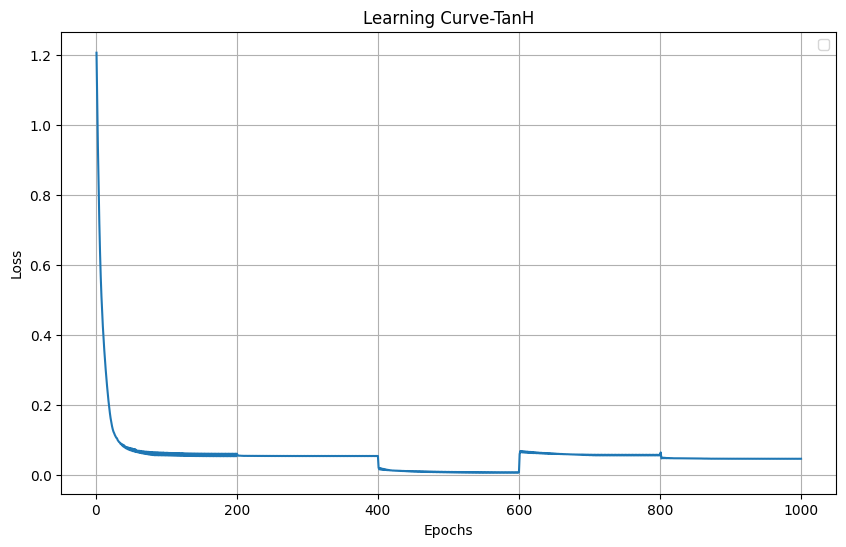

Number of Hidden Layers: 1, Neurons Per Layer: 5,  Learning Rate: 0.03


In [ ]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt



# Had to rewrite the class for Neural Network, It did not want to work with the class I had created from scratch.
class NeuralNetwork:
    def __init__(self, hidden_layers = (100,), learning_rate = 0.001, max_iter = 200, random_state = 42):
        self.hidden_layers = hidden_layers
        self.learning_rate = learning_rate
        self.max_iter = max_iter
        self.random_state = random_state
        self.train_losses = []

# Load the data inside the class to make references easier
    def load_data(self):
        iris = load_iris()
        x, y = iris.data, iris.target
        return x, y

# Create the Model.  This was taken from Sklearn's Website
    def create_model(self):
        self.model = MLPClassifier(hidden_layer_sizes = self.hidden_layers, activation='tanh',  learning_rate_init = self.learning_rate,max_iter = 1, warm_start = True,random_state = self.random_state)




# Cross Validation for Test and Training Accuracy Testing
# This too was taken from Sklearn's website in the Cross Validation Section
    def cross_validate(self, x, y, cv = 5):
        skf = StratifiedKFold(n_splits = cv, shuffle = True, random_state = self.random_state)
        scores = []
        for train_index, test_index in skf.split(x, y):
            X_train, X_test = x[train_index], x[test_index]
            y_train, y_test = y[train_index], y[test_index]
            self.train(X_train, y_train)
            score = self.model.score(X_test, y_test)
            scores.append(score)
        print(f"Cross-validation accuracy: {np.mean(scores):.4f}")
        return scores

# Train the Neural Network
    def train(self, X_train, y_train):
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        for _ in range(self.max_iter):
            self.model.fit(X_train_scaled, y_train)
            self.train_losses.append(self.model.loss_)

# Plot the Learning Curves for Comparisons
    def plot_learning_curve(self):
        plt.figure(figsize =( 10, 6))
        plt.plot(range(1, len(self.train_losses) + 1), self.train_losses)
        plt.xlabel("Epochs")
        plt.ylabel("Loss")
        plt.title(f"Learning Curve-TanH")
        plt.legend(loc="best")
        plt.grid()
        plt.show()


# Create the Neural Network
nn = NeuralNetwork(hidden_layers = (5), learning_rate = 0.03, max_iter = 200)
# Load the Data from the Iris Dataset
x, y = nn.load_data()
# Create the Model
nn.create_model()
# Cross Validate
nn.cross_validate(x, y)
# Plot the Learning Curve
nn.plot_learning_curve()

print("Number of Hidden Layers: 1, Neurons Per Layer: 5,  Learning Rate: 0.03")



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691

Cross-validation accuracy: 0.3333


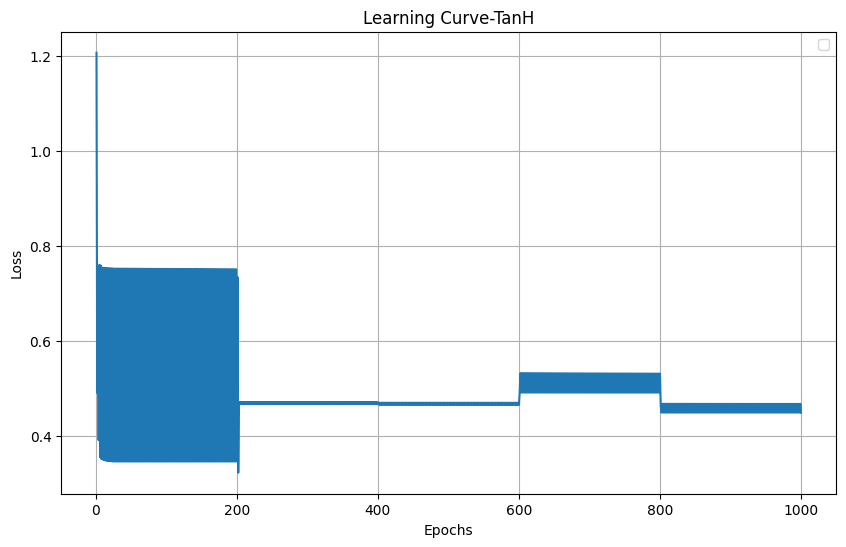

Number of Hidden Layers: 1, Neurons Per Layer: 5,  Learning Rate: 0.3


In [ ]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt



# Had to rewrite the class for Neural Network, It did not want to work with the class I had created from scratch.
class NeuralNetwork:
    def __init__(self, hidden_layers = (100,), learning_rate = 0.001, max_iter = 200, random_state = 42):
        self.hidden_layers = hidden_layers
        self.learning_rate = learning_rate
        self.max_iter = max_iter
        self.random_state = random_state
        self.train_losses = []

# Load the data inside the class to make references easier
    def load_data(self):
        iris = load_iris()
        x, y = iris.data, iris.target
        return x, y

# Create the Model.  This was taken from Sklearn's Website
    def create_model(self):
        self.model = MLPClassifier(hidden_layer_sizes = self.hidden_layers, activation='tanh',  learning_rate_init = self.learning_rate,max_iter = 1, warm_start = True,random_state = self.random_state)




# Cross Validation for Test and Training Accuracy Testing
# This too was taken from Sklearn's website in the Cross Validation Section
    def cross_validate(self, x, y, cv = 5):
        skf = StratifiedKFold(n_splits = cv, shuffle = True, random_state = self.random_state)
        scores = []
        for train_index, test_index in skf.split(x, y):
            X_train, X_test = x[train_index], x[test_index]
            y_train, y_test = y[train_index], y[test_index]
            self.train(X_train, y_train)
            score = self.model.score(X_test, y_test)
            scores.append(score)
        print(f"Cross-validation accuracy: {np.mean(scores):.4f}")
        return scores

# Train the Neural Network
    def train(self, X_train, y_train):
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        for _ in range(self.max_iter):
            self.model.fit(X_train_scaled, y_train)
            self.train_losses.append(self.model.loss_)

# Plot the Learning Curves for Comparisons
    def plot_learning_curve(self):
        plt.figure(figsize =( 10, 6))
        plt.plot(range(1, len(self.train_losses) + 1), self.train_losses)
        plt.xlabel("Epochs")
        plt.ylabel("Loss")
        plt.title(f"Learning Curve-TanH")
        plt.legend(loc="best")
        plt.grid()
        plt.show()


# Create the Neural Network
nn = NeuralNetwork(hidden_layers = (5), learning_rate = 0.3, max_iter = 200)
# Load the Data from the Iris Dataset
x, y = nn.load_data()
# Create the Model
nn.create_model()
# Cross Validate
nn.cross_validate(x, y)
# Plot the Learning Curve
nn.plot_learning_curve()

print("Number of Hidden Layers: 1, Neurons Per Layer: 5,  Learning Rate: 0.3")

